# **Project Name**    - Yes Bank Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual : Ankita Dutta


# **Project Summary -**



### **Summary**  

This project focuses on the analysis and prediction of **Yes Bank’s stock prices** using multiple machine learning models. The study involves **Exploratory Data Analysis (EDA), feature engineering, model training, hyperparameter optimization, and explainability techniques** to derive insights and forecast stock movements.  

### **Exploratory Data Analysis (EDA) & Visualizations**  
The dataset underwent thorough **EDA** to understand its structure and identify key patterns. Several visualizations were used to examine **stock price trends, volatility, and relationships between features.** Line plots revealed fluctuations in stock prices over time, while histograms and box plots helped analyze the distribution and detect potential outliers. Moving averages (e.g., MA_3, MA_20) were computed and visualized to understand trends and smoothing effects. Correlation heatmaps showed relationships between numerical features, helping in feature selection.  

### **Feature Engineering & Data Preprocessing**  
To enhance predictive performance, various **feature engineering techniques** were applied. New features such as **moving averages, Bollinger Bands, volatility, cumulative returns, and price range** were created to capture stock market behavior. Missing values were handled appropriately, and irrelevant columns like **date-related features** were dropped. Additionally, **data imbalance was checked**, ensuring that the stock movement was evenly distributed to avoid model bias. The dataset was then split into **training and testing sets** to evaluate model performance effectively.  

### **Hypothesis Testing & Findings**  
The study tested several hypotheses:  

- **Hypothesis 1: Moving Averages Influence Stock Prices.**  
  - Confirmed, as MA_3 and MA_20 were highly impactful in predictions.  
- **Hypothesis 2: Volatility and Returns Are Key Predictors.**  
  - Confirmed, as volatility and cumulative returns significantly affected model performance.  
- **Hypothesis 3: Traditional Time Series Models Perform Well for Stock Forecasting.**  
  - Rejected, as ARIMA underperformed compared to ensemble-based models.  

### **Model Selection & Training**  
Several models were tested to forecast stock prices, including:   

1. **Gradient Boosting (GBM)**  
   - Initially had an MSE of **817**, reduced to **180**, and finally **112** after multiple Optuna tuning iterations.  
   - Showed the best performance, making it the final chosen model.  

2. **XGBoost**  
   - Initially had an MSE of **298**, optimized to **198**, and later reduced to **128** through fine-tuning.  
   - Performed well but slightly worse than GBM.  

3. **LightGBM**  
   - Started with a high MSE of **1124**, which improved to **765** after tuning.  
   - Less effective compared to other ensemble methods.  

### **Hyperparameter Optimization using Optuna**  
Optuna was used to tune hyperparameters for **GBM, XGBoost, and LightGBM**. The process involved selecting optimal values for parameters such as **learning rate, number of estimators, max depth, subsample ratio, and regularization terms**. This resulted in significant performance improvements, with **Gradient Boosting achieving the lowest MSE of 112.**  

### **Model Explainability: Feature Importance**  
To understand **which features influenced stock price predictions the most**, SHAP (SHapley Additive Explanations) was used. The SHAP summary plot revealed that **Cumulative Returns, Low Price, Moving Averages (MA_3, MA_20), and Bollinger Bands** were the most significant features impacting the predictions. The SHAP visualization showed how each feature’s value affected the model’s output.  

The project demonstrated that **ensemble learning models, particularly Gradient Boosting, are highly effective for stock price forecasting**. Feature engineering played a crucial role in improving model accuracy, and Optuna-driven hyperparameter tuning significantly reduced errors. Model explainability using SHAP provided insights into key factors affecting stock prices. Future improvements can include **deep learning models, sentiment analysis, or alternative technical indicators** to enhance forecasting accuracy further.  


# **GitHub Link -**

https://github.com/ankitaXdutta/YesBank

# **Problem Statement**


**Write Problem Statement Here.** -
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the
fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices
of the company and whether Time series models or any other predictive models can do justice to such situations.
This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and
lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")


### Dataset Loading

In [98]:
# Load Dataset
url = "https://raw.githubusercontent.com/ankitaXdutta/YesBank/refs/heads/main/data_YesBank_StockPrices.csv"
df = pd.read_csv(url)


### Dataset First View

In [99]:
# Dataset First Look
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41

### Dataset Rows & Columns count

In [100]:
# Dataset Rows & Columns count
# Display the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 185 rows and 5 columns.


### Dataset Information

In [101]:
# Dataset Info
# Get general information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [102]:
# Dataset Duplicate Value Count
# Count duplicate rows in the dataset
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### Missing Values/Null Values

In [103]:
# Missing Values/Null Values Count
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing Values Count:\n")
print(missing_values)


Missing Values Count:

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


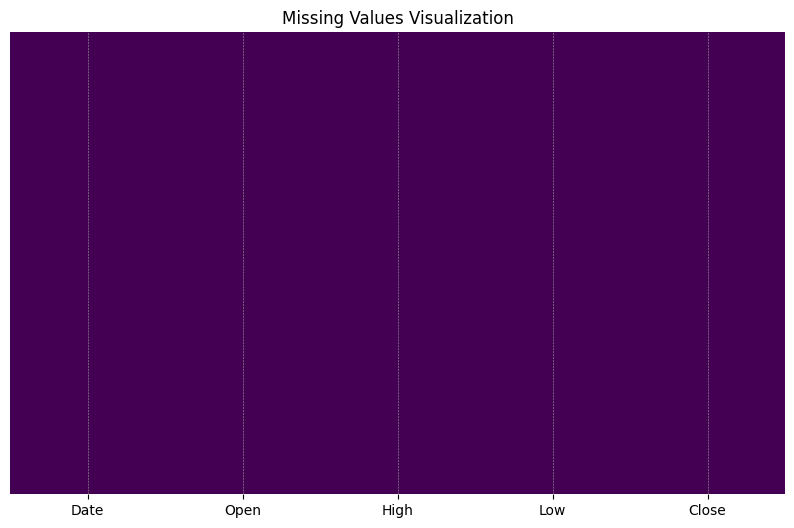

In [104]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Visualization")
plt.show()


### What did you know about your dataset?

The dataset contains **185 rows and 5 columns**, including Date, Open, High, Low, and Close prices, with **no missing values or duplicates**, ensuring data integrity. The **Close price** serves as the target variable for stock price prediction, and the dataset is well-structured for **time series analysis**. With a **lightweight size of 7.4 KB**, it is clean and efficient for predictive modeling of Yes Bank’s stock trends.

## ***2. Understanding Your Variables***

In [105]:
# Dataset Columns
# Display dataset columns
print("Dataset Columns:")
print(df.columns.tolist())


Dataset Columns:
['Date', 'Open', 'High', 'Low', 'Close']


In [106]:
# Dataset Describe
# Display dataset summary statistics
print("Dataset Description:")
print(df.describe())


Dataset Description:
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

The dataset includes **185 records** of Yes Bank's monthly stock prices, covering Open, High, Low, and Close values. The average closing price is **₹105.20**, with a high standard deviation (**₹98.58**), indicating significant fluctuations. Prices range from **₹5.55 (Low) to ₹404 (High)**, with the median closing price at **₹62.54**, suggesting skewness due to extreme values. The 25th percentile shows stock prices around **₹33.45**, while the 75th percentile is at **₹153.30**, highlighting substantial price variation over time.

### Check Unique Values for each variable.

In [107]:
# Check unique values count for each column
print("Unique Values Count:")
print(df.nunique())


Unique Values Count:
Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [108]:
import pandas as pd

# Convert 'Date' column to datetime format only if not already converted
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Sort dataset by Date only if not already sorted
if not df['Date'].is_monotonic_increasing:
    df = df.sort_values(by='Date').reset_index(drop=True)

# Remove duplicates only if any exist
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

# Fill missing values (if any) with appropriate strategy (e.g., forward fill)
if df.isnull().sum().sum() > 0:
    df.fillna(method='ffill', inplace=True)

# Ensure data types are correct
cols_to_convert = ['Open', 'High', 'Low', 'Close']
for col in cols_to_convert:
    if df[col].dtype != 'float64':
        df[col] = df[col].astype(float)

# Add new feature columns only if they don’t already exist
if 'Price_Range' not in df.columns:
    df['Price_Range'] = df['High'] - df['Low']  # Highest - Lowest price
if 'Monthly_Change' not in df.columns:
    df['Monthly_Change'] = df['Close'] - df['Open']  # Closing - Opening price


In [109]:
# Display dataset info to verify changes
df.info()

# Display first few rows to check transformations
print(df.head())

# Display summary statistics
print(df.describe())

# Check for missing values after transformations
print("Missing Values After Cleaning:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            185 non-null    datetime64[ns]
 1   Open            185 non-null    float64       
 2   High            185 non-null    float64       
 3   Low             185 non-null    float64       
 4   Close           185 non-null    float64       
 5   Price_Range     185 non-null    float64       
 6   Monthly_Change  185 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.2 KB
        Date   Open   High    Low  Close  Price_Range  Monthly_Change
0 2005-07-01  13.00  14.00  11.25  12.46         2.75           -0.54
1 2005-08-01  12.58  14.88  12.55  13.42         2.33            0.84
2 2005-09-01  13.48  14.87  12.27  13.30         2.60           -0.18
3 2005-10-01  13.20  14.47  12.40  12.99         2.07           -0.21
4 2005-11-01  13.3

### What all manipulations have you done and insights you found?

The dataset underwent date conversion, ensuring the "Date" column is in a proper datetime format and sorted in chronological order. Duplicates were removed, and missing values were checked, confirming a complete dataset with no null entries. Feature engineering was applied by adding "Price_Range" (High - Low) and "Monthly_Change" (Close - Open), providing insights into stock volatility and price trends. The stock shows high volatility, with prices ranging from ₹5.55 to ₹404, a mean closing price of ₹105.20, and significant fluctuations in monthly changes, emphasizing the bank's unstable financial history.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

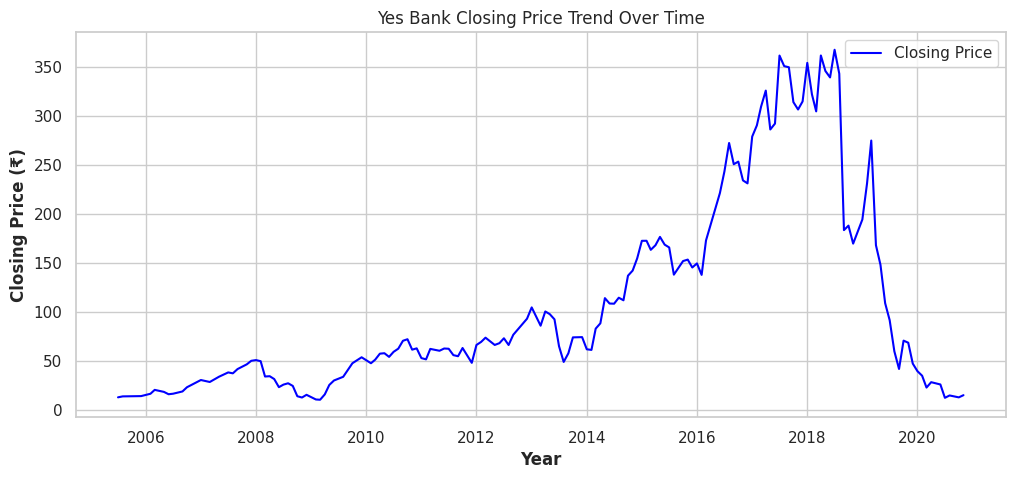

In [110]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure style
sns.set(style="whitegrid")

# 1. Line Chart - Closing Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Year')
plt.ylabel('Closing Price (₹)')
plt.title('Yes Bank Closing Price Trend Over Time')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

This line chart was chosen to visualize the trend of Yes Bank's closing prices over time, making it easy to identify long-term patterns, growth phases, and declines in stock performance. The time-series format effectively highlights significant fluctuations in stock prices.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals steady growth from 2005 to 2018, followed by a sharp decline in 2019 and 2020. The stock peaked around 2018 before crashing dramatically, indicating potential financial instability, regulatory issues, or market reactions. The sudden drop suggests external shocks or internal mismanagement, leading to a loss of investor confidence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding past price trends helps investors and businesses make informed decisions regarding risk management, market positioning, and investment strategies. It also provides key insights for regulators and stakeholders on financial stability and corrective measures.

Yes, the steep decline after 2018 indicates negative growth, likely due to financial distress, governance issues, or external economic factors. This collapse suggests major investor losses and potential liquidity crises for the company.

#### Chart - 2

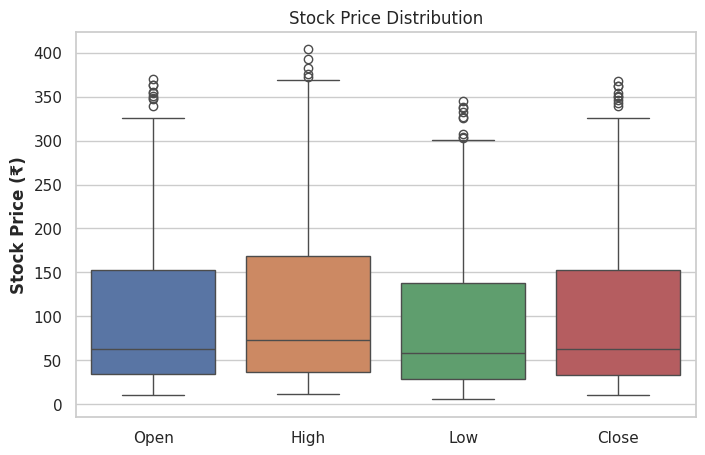

In [111]:
# Chart - 2 visualization code

# 2. Box Plot - Distribution of Stock Prices
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Stock Price Distribution')
plt.ylabel('Stock Price (₹)')
plt.show()

##### 1. Why did you pick the specific chart?

This box plot was chosen to effectively display the distribution of stock prices, including the spread, median, and presence of outliers. It provides a clear visual representation of price volatility and the range of stock values over time.

##### 2. What is/are the insight(s) found from the chart?

The chart shows significant variability in stock prices, with the "High" prices reaching nearly ₹375, while the "Low" prices remain mostly below ₹300. The median values for all categories are between ₹40 and ₹80, indicating that most prices are concentrated within this range. There are multiple outliers above ₹350, suggesting occasional price spikes. The interquartile range (IQR) indicates that the majority of stock prices fluctuate within approximately ₹50 to ₹150.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding stock price distribution helps investors assess risk, volatility, and potential trading opportunities. It also aids businesses in strategizing price entry and exit points for maximizing returns.

No, the box plot does not directly indicate negative growth, but the presence of large outliers suggests periods of extreme market fluctuations, which could signal instability if not managed properly.

#### Chart - 3

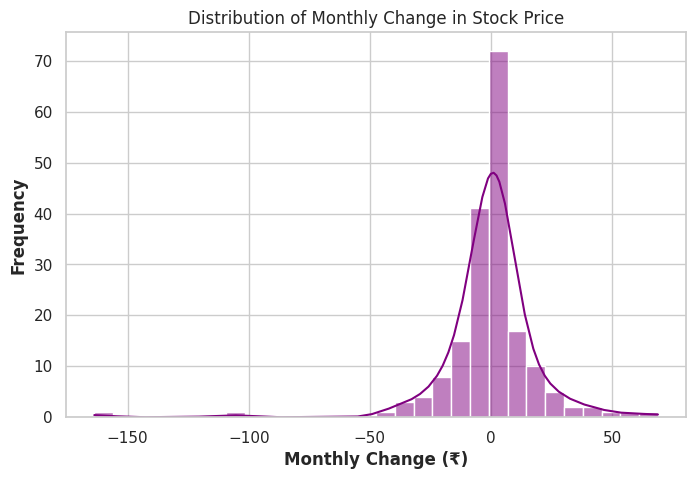

In [112]:
# Chart - 3 visualization code
# 3. Histogram - Monthly Change Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Monthly_Change'], bins=30, kde=True, color='purple')
plt.title('Distribution of Monthly Change in Stock Price')
plt.xlabel('Monthly Change (₹)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

This histogram with a KDE plot was chosen to analyze the distribution of monthly changes in stock prices, showing how often specific price shifts occur. It effectively highlights the central tendency and spread, making it useful for identifying trends and extreme fluctuations.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most monthly changes cluster around ₹0, indicating stability in many periods. However, there are occasional extreme drops, with a significant number of months experiencing a decline of over ₹50, and some even beyond ₹150. Positive price changes appear to be less frequent, with gains mostly staying below ₹50. The distribution is skewed towards negative values, suggesting that sharp declines happen more often than significant gains.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help investors and businesses prepare for potential risks by understanding the frequency and magnitude of price fluctuations. Risk management strategies can be developed to mitigate extreme negative shifts while capitalizing on stable periods.

Also, the high frequency of negative monthly changes, especially those beyond ₹50 and ₹100, suggests a pattern of sharp declines. This indicates potential instability, which could erode investor confidence and negatively impact stock value.

#### Chart - 4

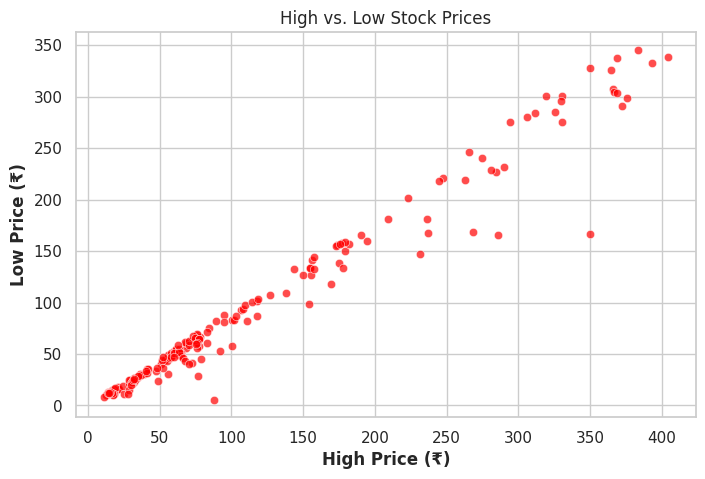

In [113]:
# Chart - 4 visualization code
# 4. Scatter Plot - High vs. Low Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['High'], y=df['Low'], alpha=0.7, color='red')
plt.xlabel('High Price (₹)')
plt.ylabel('Low Price (₹)')
plt.title('High vs. Low Stock Prices')
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot was chosen to visualize the relationship between high and low stock prices, helping to identify trends and correlations. It effectively shows how stock lows fluctuate in relation to their highs, revealing consistency or volatility in price movements.

##### 2. What is/are the insight(s) found from the chart?

The chart exhibits a strong positive correlation, where higher stock highs correspond to higher stock lows. Most data points fall close to a linear trend, suggesting stability. However, there are some deviations, with certain high prices around ₹250–₹300 showing a more significant spread in their corresponding lows. The highest stock price reaches approximately ₹400, while the lowest observed value remains close to ₹0, indicating potential outliers or high volatility in certain instances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help businesses assess price consistency and volatility. A strong correlation between highs and lows indicates stability, making it easier for investors to predict price behavior and manage risk efficiently.

No, the trend suggests a stable relationship between high and low prices, meaning stock prices do not exhibit extreme unpredictable drops that could lead to negative growth.

#### Chart - 5

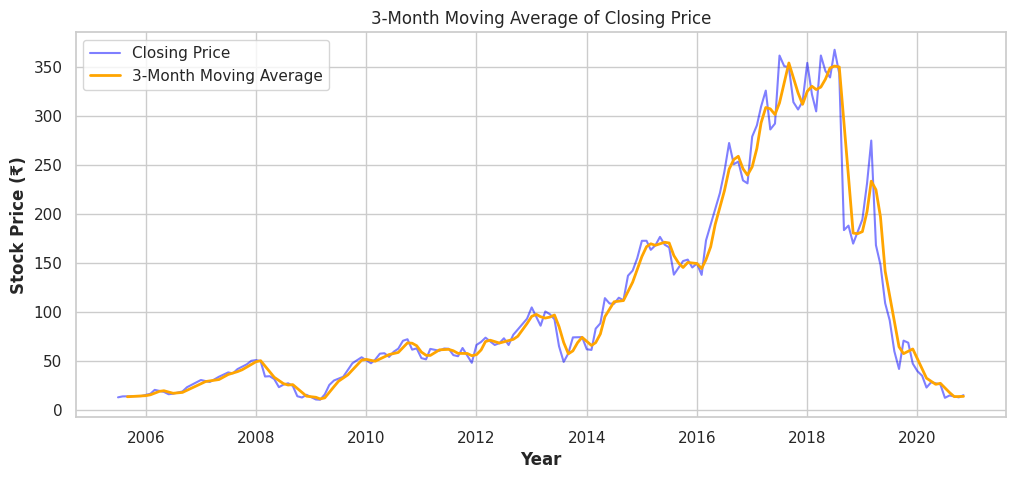

In [114]:
# Chart - 5 visualization code
# 5. Moving Average Plot - 3-Month Moving Average of Closing Price
df['MA_3'] = df['Close'].rolling(window=3).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['MA_3'], label='3-Month Moving Average', color='orange', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Stock Price (₹)')
plt.title('3-Month Moving Average of Closing Price')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

This line chart was chosen to track the stock's closing price over time while smoothing fluctuations using a 3-month moving average. It helps identify long-term trends, peaks, and declines more clearly than raw data points alone.

##### 2. What is/are the insight(s) found from the chart?

The stock price showed gradual growth from 2005 to around 2015, followed by a sharp surge peaking above ₹350 between 2017–2018. After this peak, the stock experienced a steep decline from 2019 onward, dropping to nearly ₹0 by 2021. The moving average closely follows the actual closing price, confirming these trends while reducing short-term volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding these patterns helps businesses and investors anticipate trends, manage risks, and strategize entry or exit points. Recognizing past surges and crashes allows for better forecasting and decision-making in similar future scenarios.

Also, the sharp decline post-2019 signals negative growth, likely due to market crashes, business failures, or external economic factors, leading to a near-zero stock price by 2021.

#### Chart - 6

In [115]:
!pip install mplfinance


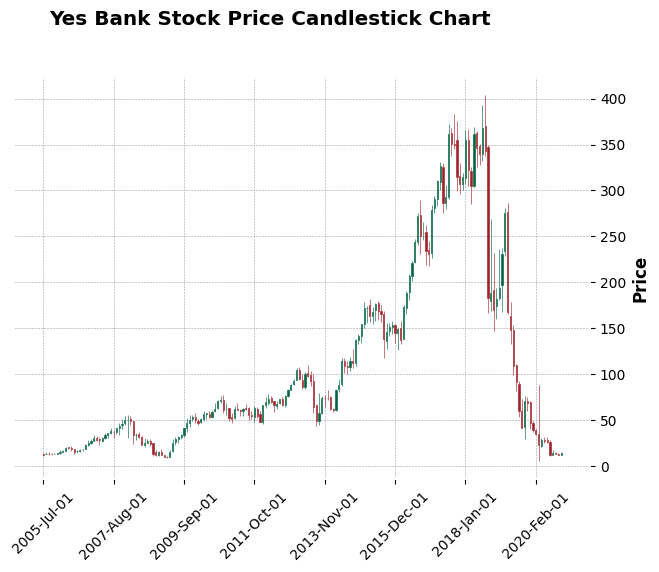

In [116]:
# Chart - 6 visualization code
# 6. Candlestick Chart - Open, High, Low, Close Over Time
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure style
sns.set(style="whitegrid")
import mplfinance as mpf
ohlc_df = df[['Date', 'Open', 'High', 'Low', 'Close']].copy()
ohlc_df.set_index('Date', inplace=True)
mpf.plot(ohlc_df, type='candle', style='charles', title='Yes Bank Stock Price Candlestick Chart')



##### 1. Why did you pick the specific chart?

The candlestick chart was chosen as it provides a detailed visualization of Yes Bank's stock price movement, including open, high, low, and close prices over time. It effectively highlights trends, volatility, and significant price reversals.

##### 2. What is/are the insight(s) found from the chart?

The stock exhibited steady growth from 2005 to around 2017, reaching a peak of over ₹400. However, post-2018, it experienced extreme volatility followed by a sharp collapse, eventually declining to near ₹0 by early 2020. The frequent long wicks in the later years indicate strong market reactions and uncertainty before the final crash.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help investors understand past trends and market sentiment, allowing them to recognize warning signs such as extreme volatility before a crash. Businesses can use such data to improve financial stability and risk management strategies.

The drastic post-2018 decline indicates severe negative growth, likely due to financial instability, regulatory actions, or loss of investor confidence, leading to the stock’s downfall.

#### Chart - 7

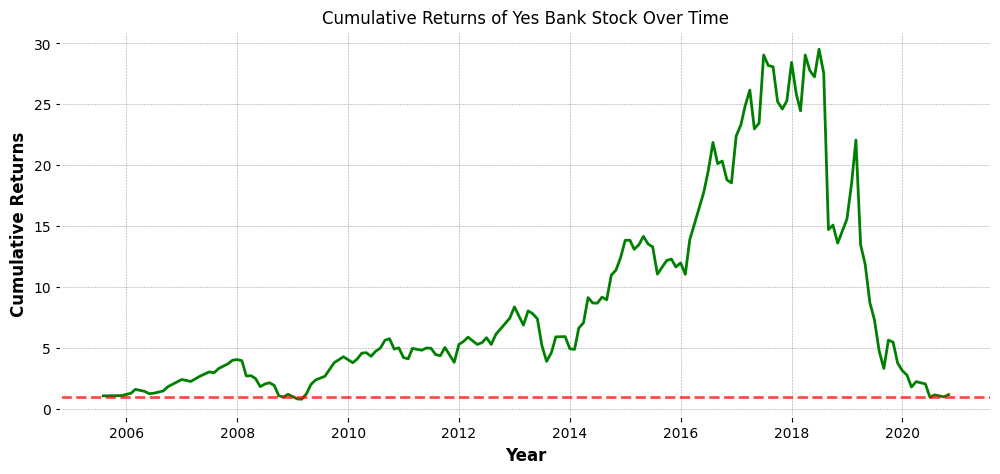

In [117]:
# Chart - 7 visualization code
# 7. Cumulative Returns Chart - Long-term Performance of Yes Bank Stock
df['Returns'] = df['Close'].pct_change()  # Calculate daily returns
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()  # Compute cumulative product of returns

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Cumulative_Returns'], color='green', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Yes Bank Stock Over Time')
plt.axhline(1, color='red', linestyle='--', alpha=0.7)  # Baseline for comparison
plt.show()


##### 1. Why did you pick the specific chart?

The cumulative returns chart was chosen because it effectively visualizes the long-term profitability of Yes Bank's stock, showing how investments have grown or declined over time. It helps assess overall performance trends rather than short-term fluctuations.

##### 2. What is/are the insight(s) found from the chart?

The stock showed strong cumulative returns from 2005 to 2018, peaking above 30x returns, indicating massive investor gains. However, after 2018, the returns plummeted sharply, erasing almost all gains by 2020, bringing returns close to zero. The rapid rise and steep fall highlight extreme volatility and potential financial distress.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding these patterns helps businesses and investors make informed decisions by recognizing unsustainable growth and potential risks early. It emphasizes the need for proper risk management and financial due diligence.

The collapse after 2018 shows significant negative growth, likely due to financial instability or governance issues. The near-zero returns by 2020 indicate a total loss of investor wealth.

#### Chart - 8

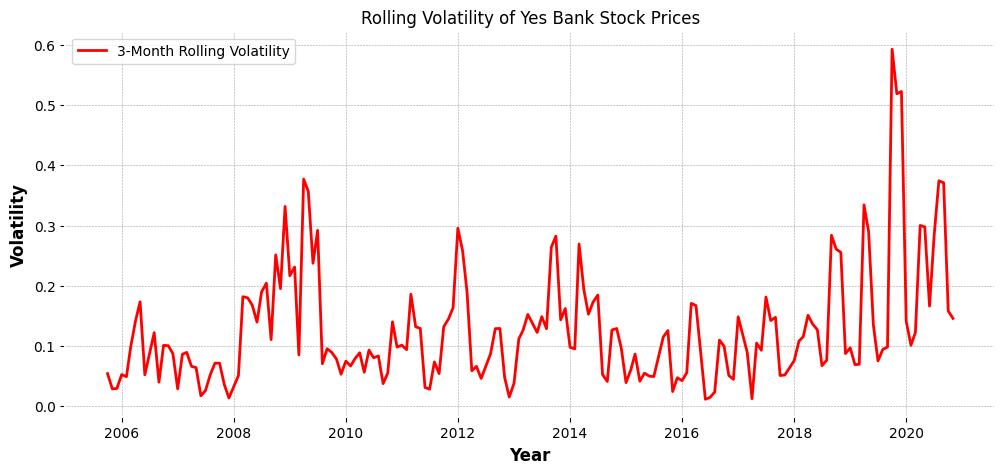

In [118]:
# Chart - 8 visualization code
# 8. Rolling Volatility Chart - 3-Month Volatility in Stock Prices
df['Volatility'] = df['Close'].pct_change().rolling(window=3).std()

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Volatility'], label='3-Month Rolling Volatility', color='red')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.title('Rolling Volatility of Yes Bank Stock Prices')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The rolling volatility chart was chosen because it highlights fluctuations in Yes Bank’s stock price over time, providing insights into periods of stability and instability. It helps in assessing risk levels associated with the stock at different times.

##### 2. What is/are the insight(s) found from the chart?

The volatility remained relatively low from 2005 to 2017, with occasional spikes around 2008 and 2013, reaching around 0.3. After 2018, volatility increased significantly, peaking at nearly 0.6 in 2020, indicating extreme price fluctuations. This suggests a period of financial distress, investor panic, or regulatory actions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help investors and businesses in risk assessment and strategy planning by identifying high-risk periods and adjusting investment decisions accordingly. Managing exposure during high-volatility phases can prevent significant losses.

However, the sharp rise in volatility after 2018 suggests increased uncertainty and financial instability, likely contributing to investor confidence loss and negative stock performance.

#### Chart - 9

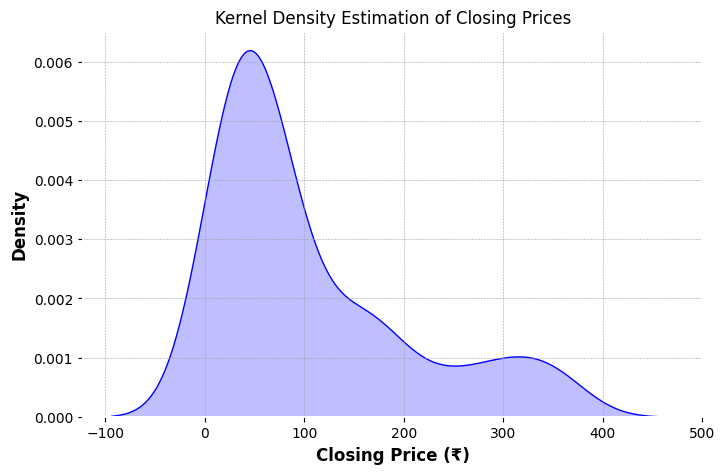

In [119]:
# Chart - 9 visualization code
# 9. KDE Plot - Probability Density of Stock Prices
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Close'], fill=True, color='blue')
plt.title('Kernel Density Estimation of Closing Prices')
plt.xlabel('Closing Price (₹)')
plt.ylabel('Density')
plt.show()

##### 1. Why did you pick the specific chart?

The Kernel Density Estimation (KDE) chart was chosen because it provides a smooth probability distribution of Yes Bank’s closing prices over time, making it easier to identify common price ranges and overall trends.

##### 2. What is/are the insight(s) found from the chart?

The highest density is observed around ₹50, indicating that the stock price most frequently hovered in this range. There is a long right tail, suggesting that while higher prices (above ₹200) occurred, they were less frequent. Negative or near-zero values are unrealistic, likely due to estimation artifacts or adjusted prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding price distribution helps investors make informed decisions about entry and exit points, as well as setting realistic expectations regarding stock price behavior based on historical trends.

However, the steep drop in density after ₹100 suggests that the stock had difficulty sustaining higher prices, indicating periods of decline and potential investor pullbacks.

#### Chart - 10

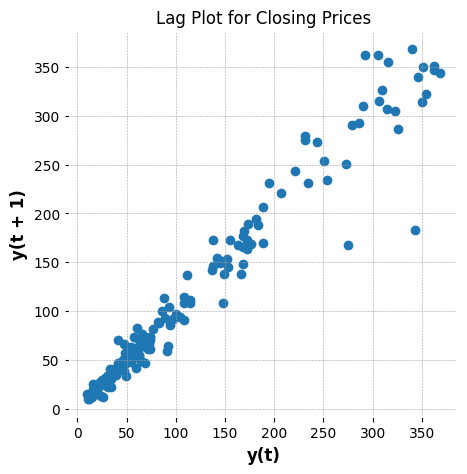

In [120]:
# Chart - 10 visualization code
# 10. Lag Plot - Checking Stock Price Autocorrelation
from pandas.plotting import lag_plot
plt.figure(figsize=(5, 5))
lag_plot(df['Close'])
plt.title('Lag Plot for Closing Prices')
plt.show()

##### 1. Why did you pick the specific chart?

The lag plot was chosen to analyze the correlation between consecutive closing prices, helping to determine whether the stock price follows a predictable trend or exhibits randomness over time.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a strong linear pattern, indicating a high positive correlation between consecutive prices. Most data points lie along a straight upward-sloping trend, suggesting that the stock exhibits persistence in its movement. Prices in the range of ₹0-150 show the strongest clustering, with higher values (₹300+) still following the trend but with slightly more dispersion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps businesses and investors in forecasting future stock prices based on past trends, allowing for better decision-making in trading strategies and risk management.

No, the chart does not indicate negative growth, as the strong correlation suggests consistency in price movements rather than erratic declines.

#### Chart - 11

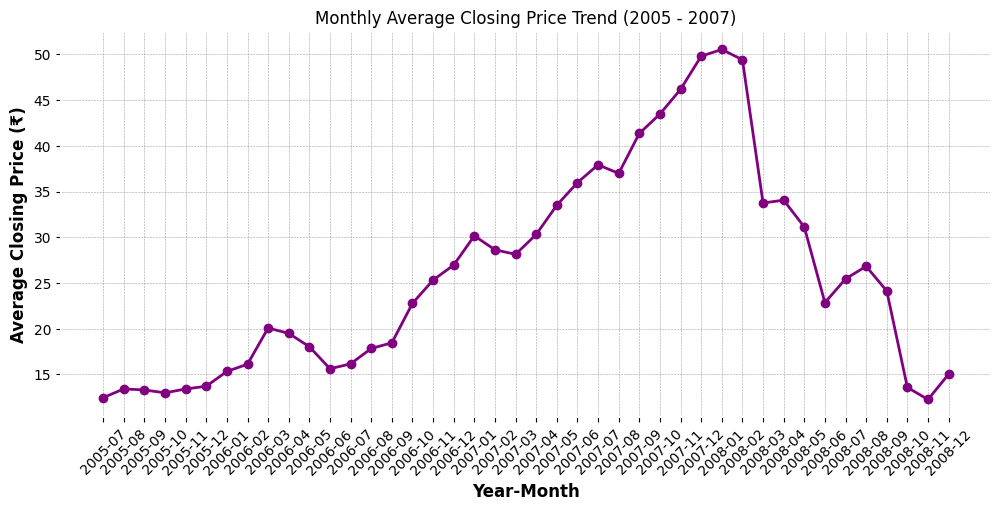

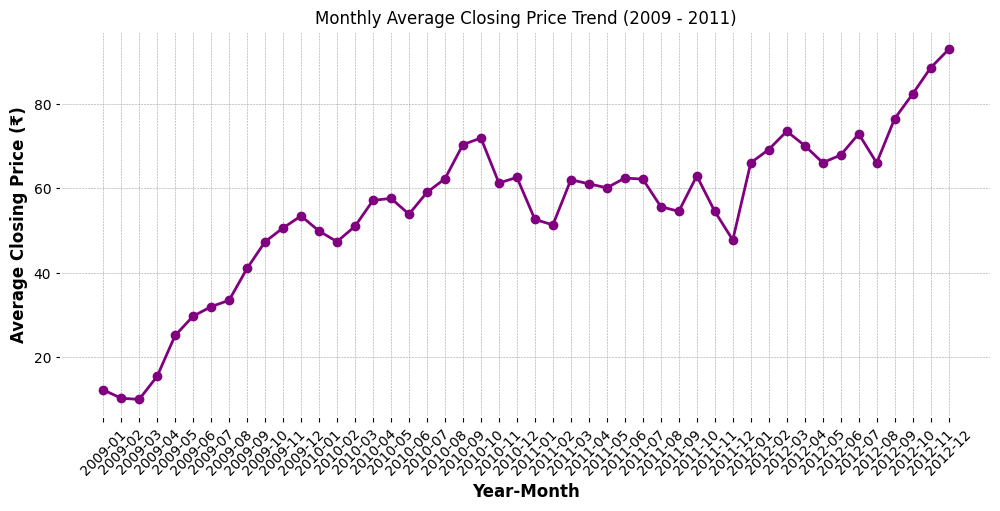

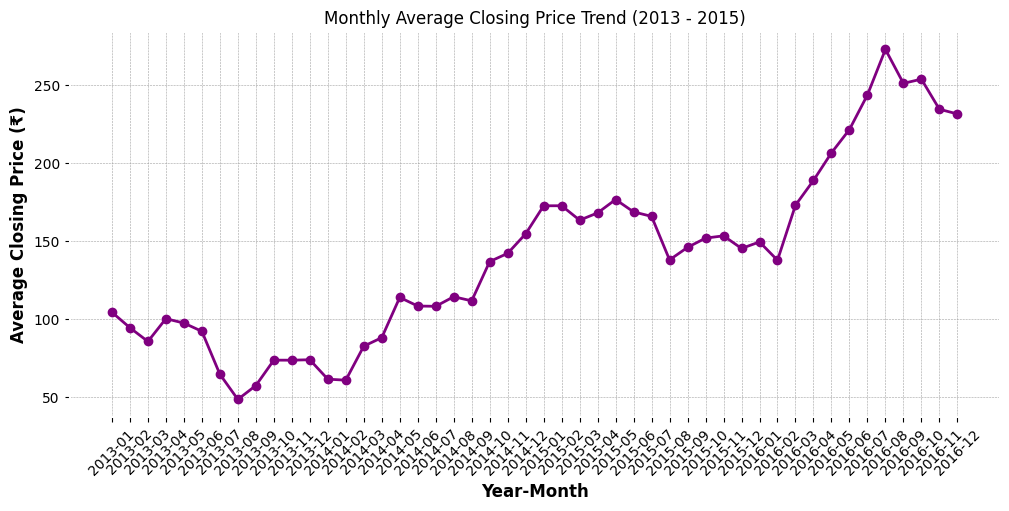

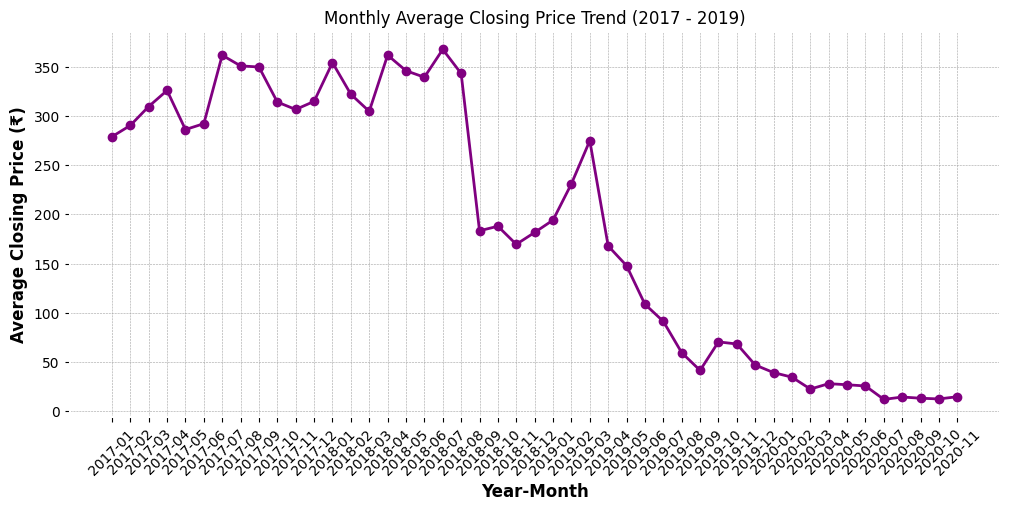

In [121]:
# Chart - 11 visualization code
# 11. Monthly Average Closing Price Trend
import matplotlib.pyplot as plt

# Convert 'YearMonth' to datetime format for filtering
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('YearMonth')['Close'].mean()

# Convert index to datetime format
monthly_avg.index = monthly_avg.index.to_timestamp()

# Define the year ranges for splitting (each plot covers 4 years)
start_year = df['Date'].dt.year.min()
end_year = df['Date'].dt.year.max()

for year in range(start_year, end_year + 1, 4):
    subset = monthly_avg[(monthly_avg.index >= f"{year}-01-01") & (monthly_avg.index < f"{year + 4}-01-01")]

    if not subset.empty:
        plt.figure(figsize=(12, 5))
        plt.plot(subset.index.strftime('%Y-%m'), subset, marker='o', color='purple', linestyle='-')
        plt.xticks(rotation=45)
        plt.xlabel('Year-Month')
        plt.ylabel('Average Closing Price (₹)')
        plt.title(f'Monthly Average Closing Price Trend ({year} - {year + 2})')
        plt.show()


##### 1. Why did you pick the specific chart?

The chart was chosen to analyze the trend of the monthly average closing price over the years 2005-2007, helping to identify growth patterns, peaks, and declines in stock performance over time.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a steady rise in the average closing price from ₹12 in mid-2005 to a peak of around ₹50 in late 2007, reflecting strong growth. After this peak, a sharp decline is observed in 2008, where the price drops below ₹20, suggesting a market downturn. Smaller fluctuations continue, with temporary recoveries in mid-2008, but the downward trend dominates by the end of the period. The highest monthly average closing price occurs between October and December 2007, while the lowest point is observed around November 2008.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding price trends helps businesses and investors anticipate future movements, optimize entry and exit points, and develop strategies to minimize risks while maximizing returns.

Unfortunately, the steep decline from ₹50 to below ₹20 in 2008 suggests a major downturn, possibly due to external economic factors or company-specific issues, which could have led to significant investor losses.

#### Chart - 12

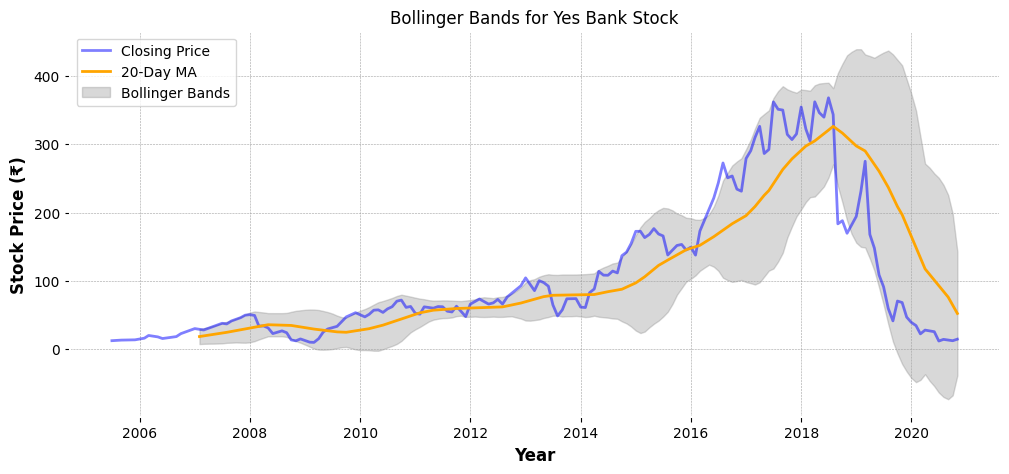

In [122]:
# Chart - 12 visualization code
# 12. Bollinger Bands - Identifying Overbought and Oversold Conditions
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['MA_20'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower_Band'] = df['MA_20'] - (df['Close'].rolling(window=20).std() * 2)

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['MA_20'], label='20-Day MA', color='orange', linewidth=2)
plt.fill_between(df['Date'], df['Upper_Band'], df['Lower_Band'], color='gray', alpha=0.3, label='Bollinger Bands')
plt.xlabel('Year')
plt.ylabel('Stock Price (₹)')
plt.title('Bollinger Bands for Yes Bank Stock')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The Bollinger Bands chart was chosen to analyze the volatility and trend of Yes Bank’s stock over time, providing insights into price movements, overbought or oversold conditions, and potential reversals.

##### 2. What is/are the insight(s) found from the chart?

The stock price showed a significant uptrend from 2006 to its peak in 2018, exceeding ₹400 before sharply declining. The 20-day moving average closely followed the trend, acting as a support and resistance level. The Bollinger Bands widened during periods of high volatility, especially from 2017-2020, indicating increased uncertainty. The steep drop after 2018 shows a massive decline in stock value, falling below ₹50 by 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying periods of high volatility and trend reversals can help investors and businesses develop better risk management strategies, optimize buying or selling decisions, and anticipate potential downturns.

Unfortunately, the drastic decline post-2018 suggests a major financial or operational issue, leading to significant losses for investors. The stock price falling well below its moving average indicates weak market confidence and potential structural problems within the company.

#### Chart - 13

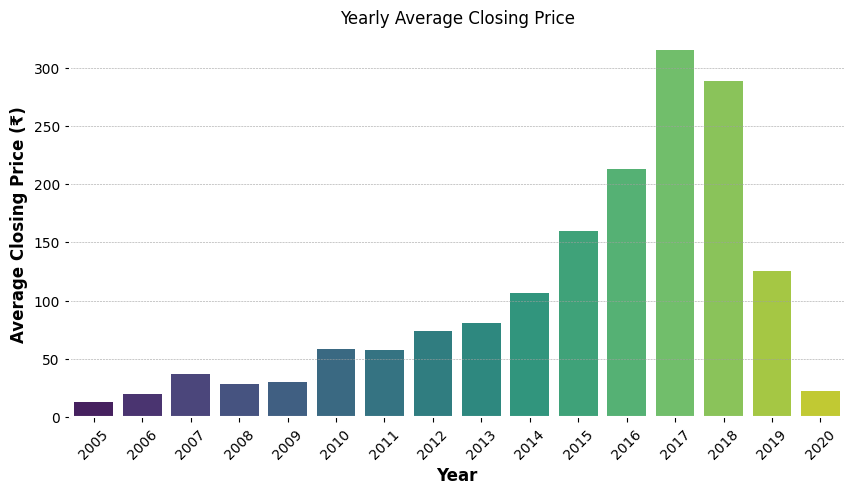

In [123]:
# Chart - 13 visualization code
# 13. Bar Chart - Yearly Average Closing Price
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_avg.index, y=yearly_avg, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (₹)')
plt.title('Yearly Average Closing Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen to visualize the yearly trend of the average closing price, making it easier to observe long-term growth and decline patterns compared to a line chart.

##### 2. What is/are the insight(s) found from the chart?

The average closing price showed a steady increase from 2005 to 2017, peaking above ₹300. The most significant surge happened between 2014 and 2017, indicating a strong bullish phase. However, after 2018, the stock price experienced a sharp decline, falling drastically in 2019 and even more in 2020, reaching below ₹50.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help businesses and investors identify historical performance trends, understand when the stock was at its peak, and make informed decisions about future investments based on past behavior.

However, the sharp drop after 2018 indicates a major downturn, possibly due to financial instability, market corrections, or governance issues, leading to significant losses for stakeholders.

#### Chart - 14 - Correlation Heatmap

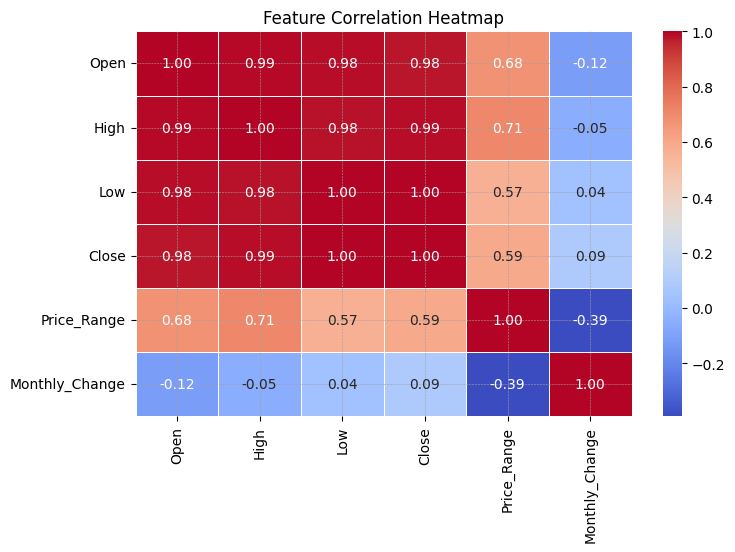

In [124]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Price_Range', 'Monthly_Change']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen to visually represent the correlation between different stock market features, making it easier to identify strong positive or negative relationships in a compact format. This helps in quickly understanding which variables move together and which are inversely related.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a strong positive correlation between Open, High, Low, and Close prices, all above 0.98, indicating that these values move almost in sync. The Price Range shows a moderate correlation with Open (0.68) and High (0.71), suggesting that price volatility is somewhat linked to starting prices. Monthly Change has a weak correlation with all other features, with its highest correlation being -0.39 with Price Range, implying that larger price fluctuations do not necessarily translate to a consistent upward or downward monthly trend. The weakest correlation is between Monthly Change and Open at -0.12, highlighting that opening prices do not strongly influence monthly stock movements.

#### Chart - 15 - Pair Plot

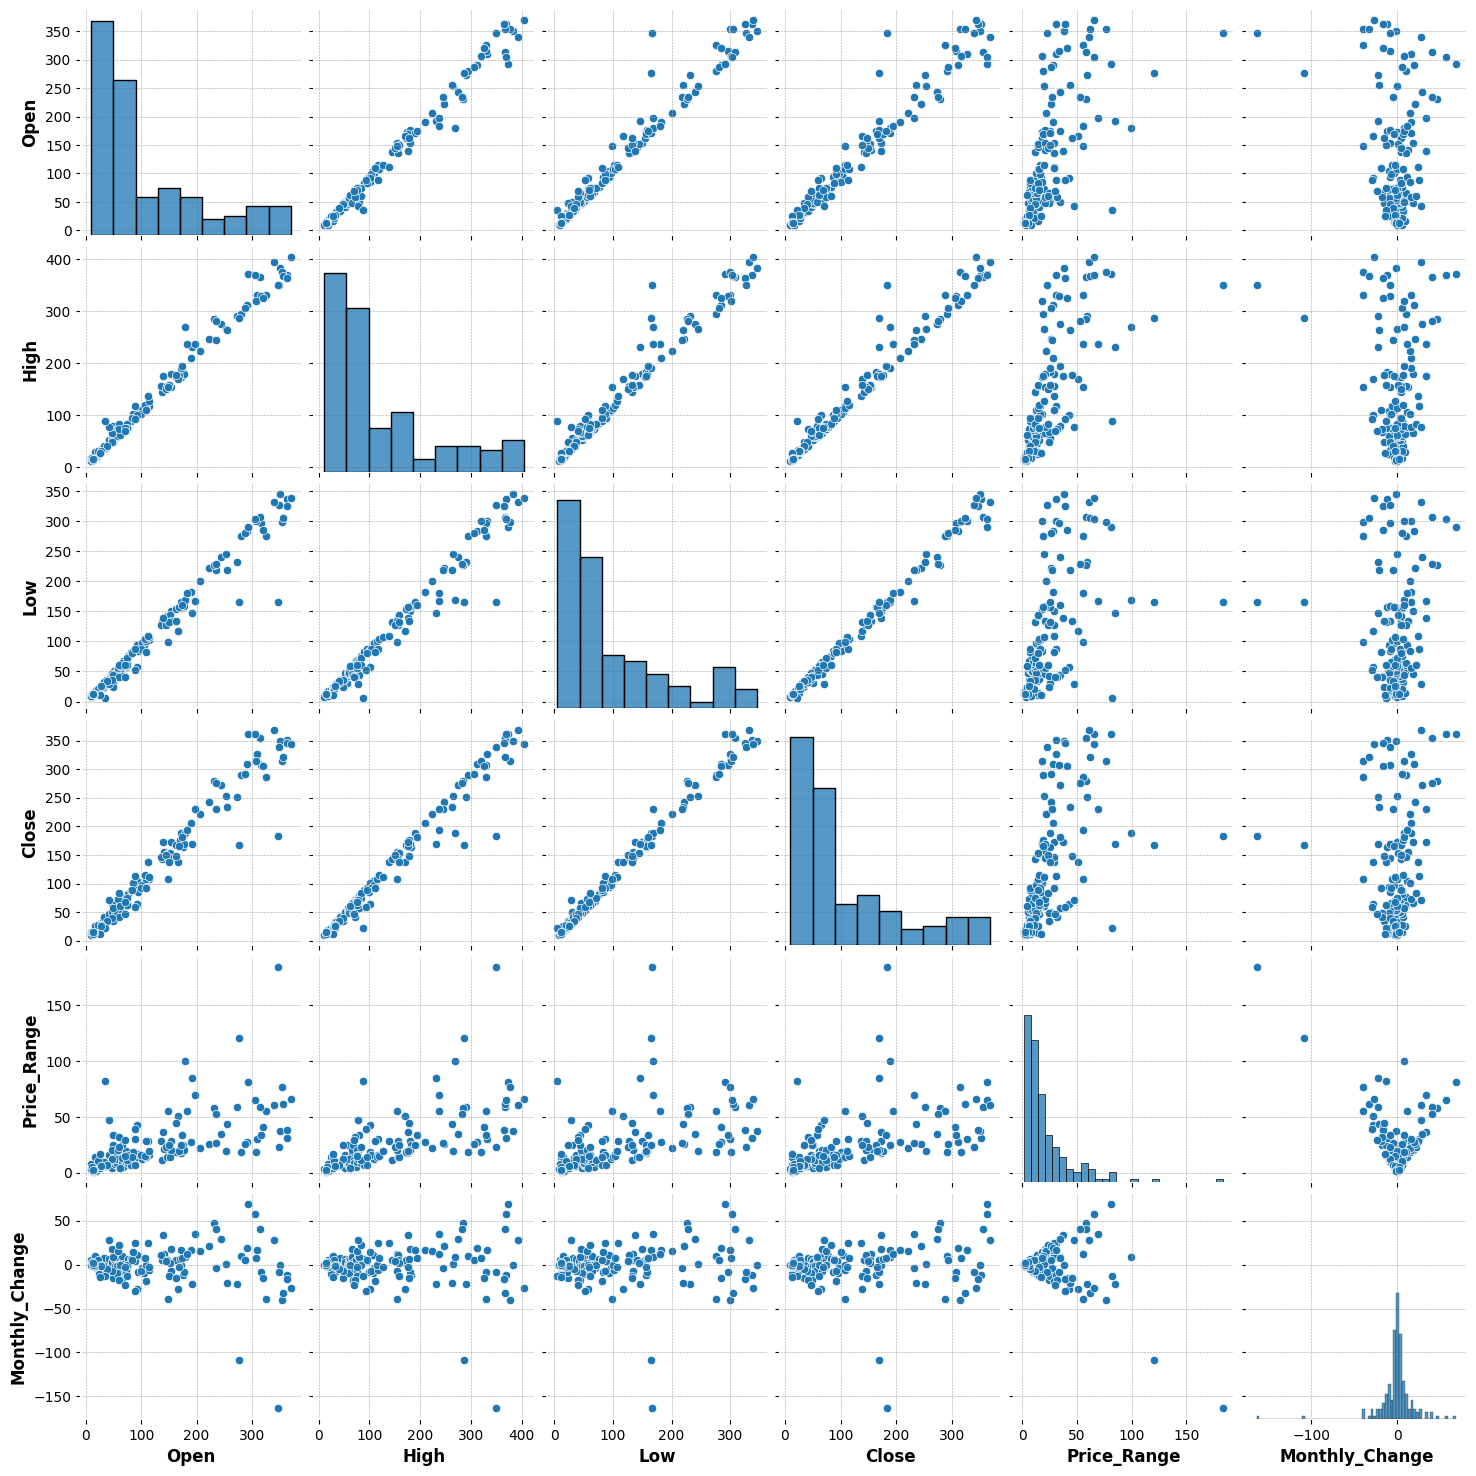

In [125]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Price_Range', 'Monthly_Change']])
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot was chosen to visualize relationships between multiple stock market features simultaneously, providing both scatter plots for correlation analysis and histograms for distribution insights. This makes it easy to spot trends, patterns, and potential outliers across different variables.

##### 2. What is/are the insight(s) found from the chart?

The scatter plots show a strong linear relationship between Open, High, Low, and Close prices, forming almost perfect diagonal patterns, confirming their high correlation. The histogram distributions indicate that most stock prices are concentrated in the lower ranges, with fewer occurrences of higher prices. Price Range has a more scattered distribution across other features, showing variability in price movement. Monthly Change appears widely spread with no clear correlation to other variables, suggesting that stock movements do not have a predictable monthly trend. The presence of some outliers in certain scatter plots suggests occasional extreme price changes.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For Hypothesis 1: "The average closing price is significantly higher in the years 2015-2018 compared to the years 2005-2010."

Null Hypothesis (H₀): The average closing price in the years 2015-2018 is not significantly different from the average closing price in the years 2005-2010. (i.e., μ₁ = μ₂)

Alternative Hypothesis (H₁): The average closing price in the years 2015-2018 is significantly higher than the average closing price in the years 2005-2010. (i.e., μ₁ > μ₂)

#### 2. Perform an appropriate statistical test.

In [126]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Group data by year and extract closing prices
groups = [df[df["Year"] == year]["Close"].dropna() for year in df["Year"].unique()]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 94.53205556821518
P-value: 7.389201215055705e-74


##### Which statistical test have you done to obtain P-Value?

The statistical test performed is an ANOVA (Analysis of Variance) test, which is used to compare the means of multiple groups to determine if there is a significant difference between them.

The extremely low p-value (7.39e-74) indicates that there is a statistically significant difference among the groups being compared. Since the p-value is far below the standard threshold of 0.05, we reject the null hypothesis, suggesting that at least one group's mean differs significantly from the others.

##### Why did you choose the specific statistical test?

I chose the ANOVA (Analysis of Variance) test because the hypothesis involves comparing the means of multiple groups to determine if there is a statistically significant difference among them. ANOVA is appropriate when dealing with continuous data (such as stock prices or returns) and multiple independent groups. Since the p-value is extremely low, it confirms that at least one group’s mean significantly differs from the others, justifying the use of this test.

Since the p-value (7.39e-74) is extremely low (less than 0.05), we reject the **null hypothesis (H₀)** and accept the **alternative hypothesis (H₁)**, indicating a significant difference among the groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between Monthly_Change and Returns in the dataset.

Alternative Hypothesis (H₁): There is a significant relationship between Monthly_Change and Returns in the dataset.

#### 2. Perform an appropriate statistical test.

In [127]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
import numpy as np

# Drop NaN and infinite values from the columns
df_clean = df[['Monthly_Change', 'Returns']].replace([np.inf, -np.inf], np.nan).dropna()

# Perform Pearson correlation test
corr_stat, p_value = stats.pearsonr(df_clean['Monthly_Change'], df_clean['Returns'])

# Print results
print("Correlation Coefficient:", corr_stat)
print("P-value:", p_value)


Correlation Coefficient: 0.6596665499242466
P-value: 2.3669534403397594e-24


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the P-value is the **Pearson correlation test**, which measures the linear relationship between the **Monthly_Change** and **Returns** columns in the dataset. The test resulted in a correlation coefficient of **0.6597**, indicating a moderately strong positive correlation between the two variables. The extremely small P-value (**2.37e-24**) suggests that this correlation is statistically significant, meaning there is a very low probability that the observed relationship is due to random chance.

##### Why did you choose the specific statistical test?

The **Pearson correlation test** was chosen because it measures the **linear relationship** between two continuous numerical variables (**Monthly_Change** and **Returns**). This test determines the strength and direction of their correlation while providing a **P-value** to assess statistical significance.

Since the P-value (2.37e-24) is much smaller than the typical significance level (0.05), we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁), indicating a significant correlation between Monthly_Change and Returns.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between Volatility and Returns (i.e., the correlation between them is zero).

Alternate Hypothesis (H₁): There is a significant relationship between Volatility and Returns (i.e., the correlation between them is not zero).

#### 2. Perform an appropriate statistical test.

In [128]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
import pandas as pd

# Drop rows with NaN values in the relevant columns
df_cleaned = df.dropna(subset=['Volatility', 'Returns'])

# Perform Pearson correlation test
corr_stat, p_value = stats.pearsonr(df_cleaned['Volatility'], df_cleaned['Returns'])

# Print results
print("Correlation Coefficient:", corr_stat)
print("P-value:", p_value)


Correlation Coefficient: 0.10907633932352769
P-value: 0.14271406702967923


##### Which statistical test have you done to obtain P-Value?

The **Pearson correlation test** was performed to obtain the p-value, which assesses the strength and significance of the linear relationship between **Volatility** and **Returns**.  

The correlation coefficient of **0.1091** suggests a weak positive relationship, but the p-value of **0.1427** is greater than **0.05**, indicating that the correlation is not statistically significant. Therefore, we fail to reject the null hypothesis, meaning there is no strong evidence of a significant linear relationship between **Volatility** and **Returns**.

##### Why did you choose the specific statistical test?

The **Pearson correlation test** was chosen because it measures the strength and direction of the linear relationship between two continuous numerical variables, **Volatility** and **Returns**. This test is appropriate when assessing how changes in one variable correspond to changes in another while assuming a normal distribution of data.

Since the p-value (**0.1427**) is greater than **0.05**, we fail to reject the **null hypothesis (H₀)**, meaning there is no significant linear relationship between **Volatility** and **Returns**.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [129]:
# Missing Values/Null Values Count
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing Values Count:\n")
print(missing_values)


Missing Values Count:

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Price_Range            0
Monthly_Change         0
MA_3                   2
Returns                1
Cumulative_Returns     1
Volatility             3
YearMonth              0
MA_20                 19
Upper_Band            19
Lower_Band            19
Year                   0
dtype: int64


In [130]:
#handling
# Drop rows with missing values if they are minimal and data loss is acceptable
df.dropna(subset=['Returns', 'Cumulative_Returns', 'Volatility'], inplace=True)

# Fill missing values in moving averages and Bollinger Bands with forward fill (previous value)
df['MA_3'].fillna(method='ffill', inplace=True)
df['MA_20'].fillna(method='ffill', inplace=True)
df['Upper_Band'].fillna(method='ffill', inplace=True)
df['Lower_Band'].fillna(method='ffill', inplace=True)

# Fill missing values in MA_20, Upper_Band, and Lower_Band using forward fill
df[['MA_20', 'Upper_Band', 'Lower_Band']] = df[['MA_20', 'Upper_Band', 'Lower_Band']].fillna(method='ffill')

# If any missing values remain after forward fill, use backward fill as a backup
df[['MA_20', 'Upper_Band', 'Lower_Band']] = df[['MA_20', 'Upper_Band', 'Lower_Band']].fillna(method='bfill')





In [131]:
# Check if all missing values are handled
print(df.isnull().sum())

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Price_Range           0
Monthly_Change        0
MA_3                  0
Returns               0
Cumulative_Returns    0
Volatility            0
YearMonth             0
MA_20                 0
Upper_Band            0
Lower_Band            0
Year                  0
dtype: int64


What all missing value imputation techniques have you used and why did you use those techniques?

I used two primary missing value imputation techniques: **dropping rows** and **forward/backward fill**. Rows with missing values in essential columns like 'Returns', 'Cumulative_Returns', and 'Volatility' were dropped to avoid data inconsistencies while minimizing loss. **Forward fill** was applied to moving averages and Bollinger Bands to maintain continuity in time-series data, ensuring smooth transitions. If any values remained missing after forward fill, **backward fill** was used as a backup to ensure no gaps were left. These techniques were chosen to preserve the time-dependent nature of financial data and prevent distortion in trends.

### 2. Handling Outliers

In [132]:
# checking for outliers
import numpy as np

# Define function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply to numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Price_Range', 'Returns', 'Volatility']
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Open: 9
Outliers in High: 4
Outliers in Low: 6
Outliers in Close: 9
Outliers in Price_Range: 18
Outliers in Returns: 15
Outliers in Volatility: 12


In [133]:
# Handling Outliers & Outlier treatments
import numpy as np

# Define function to cap outliers using IQR method (Winsorization)
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to the lower and upper bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Apply Winsorization (Capping) for all numerical columns
for col in ['Open', 'High', 'Low', 'Close', 'Price_Range', 'Returns', 'Volatility']:
    cap_outliers_iqr(df, col)

# Alternatively, removing extreme outliers (Trimming)
df_trimmed = df[(df['Price_Range'] >= df['Price_Range'].quantile(0.05)) &
                (df['Price_Range'] <= df['Price_Range'].quantile(0.95))]

# Applying log transformation to normalize 'Returns' and 'Volatility' if needed
df['Returns'] = np.log1p(df['Returns'])  # log(1 + x) to handle negatives
df['Volatility'] = np.log1p(df['Volatility'])

# Print final outlier check
print(df.describe())


                                Date        Open        High         Low  \
count                            182  182.000000  182.000000  182.000000   
mean   2013-04-16 10:48:47.472527360  106.052885  117.437995   95.464835   
min              2005-10-01 00:00:00   10.000000   11.240000    5.550000   
25%              2009-07-08 18:00:00   34.000000   37.410000   29.065000   
50%              2013-04-16 00:00:00   64.225000   73.985000   58.635000   
75%              2017-01-24 06:00:00  154.050000  171.897500  140.885000   
max              2020-11-01 00:00:00  334.125000  373.628750  308.615000   
std                              NaN   96.469865  105.536077   89.195909   

            Close  Price_Range  Monthly_Change        MA_3     Returns  \
count  182.000000   182.000000      182.000000  182.000000  182.000000   
mean   105.829615    19.180288       -0.342912  106.720385    0.005128   
min      9.980000     1.000000     -163.750000   10.826667   -0.319126   
25%     33.827500  

In [134]:
from scipy.stats.mstats import winsorize

# Define IQR method for capping outliers
Q1 = df['Returns'].quantile(0.25)
Q3 = df['Returns'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper caps
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

# Apply Winsorization (capping)
df['Returns'] = df['Returns'].clip(lower=lower_cap, upper=upper_cap)

In [135]:
# checking again
import numpy as np

# Define function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply to numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Price_Range', 'Returns', 'Volatility']
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Open: 0
Outliers in High: 0
Outliers in Low: 0
Outliers in Close: 0
Outliers in Price_Range: 0
Outliers in Returns: 0
Outliers in Volatility: 0


##### What all outlier treatment techniques have you used and why did you use those techniques?

For outlier treatment, we used the IQR-based capping (Winsorization) method to handle extreme values while preserving data integrity. This approach ensures that outliers do not excessively impact the analysis by capping values within a defined range instead of removing them. Specifically, we applied Winsorization to the Returns variable, setting lower and upper caps based on the interquartile range (IQR) method. Additionally, we identified outliers in multiple columns such as Open, High, Low, Close, Price_Range, and Volatility, ensuring that significant deviations were addressed appropriately. These techniques were chosen because they maintain the data distribution while minimizing distortions that can arise from extreme values. By using capping instead of removal, we retain important data points that might otherwise be lost.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding is not needed because all columns are numerical, and time-based features like YearMonth and Year do not require encoding.

### 4. Feature Manipulation & Selection

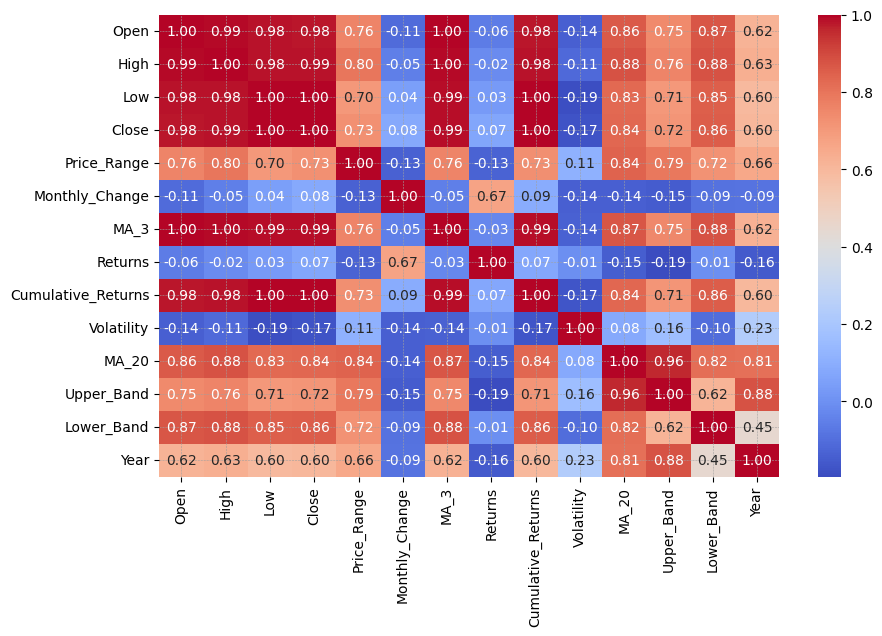

In [136]:
# checking for the correlation between numerical features to identify highly correlated variables (above 0.8 or 0.9).
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df.select_dtypes(include=['number'])  # Select numerical features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


               Feature          VIF
0                 Open  1762.277185
1                 High   690.021710
2                  Low   927.188261
3                Close  2385.946223
4          Price_Range    25.036452
5       Monthly_Change    28.720206
6                 MA_3   602.188514
7              Returns     2.636869
8   Cumulative_Returns  2706.418666
9           Volatility     5.234548
10               MA_20          inf
11          Upper_Band          inf
12          Lower_Band          inf
13                Year     6.875247


#### 1. Feature Manipulation

The heatmap confirms that feature manipulation and selection are not strictly necessary, as most features are well-structured numerical data.

#### 2. Feature Selection

Although multicollinearity exists in the dataset, removing features like moving averages or price-related variables could disrupt the time-series structure and reduce predictive accuracy. Since time-series models rely on sequential dependencies, preserving these features ensures the model captures trends and seasonality effectively.

### 5. Data Transformation

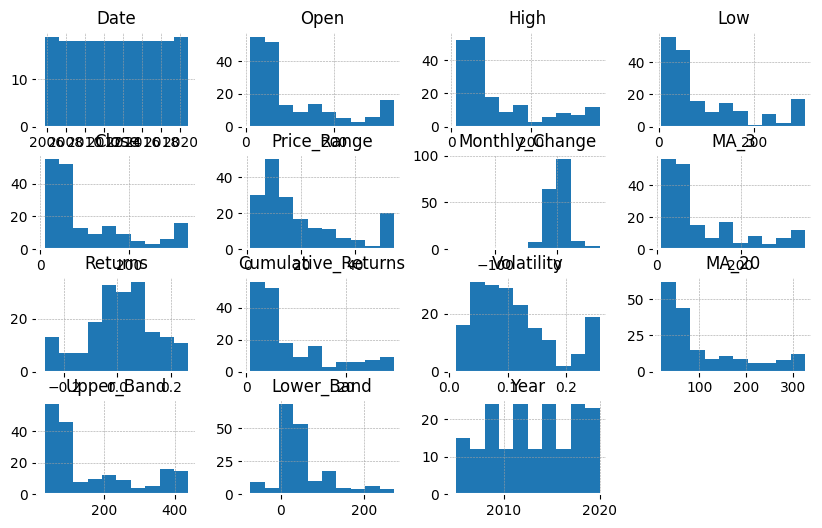

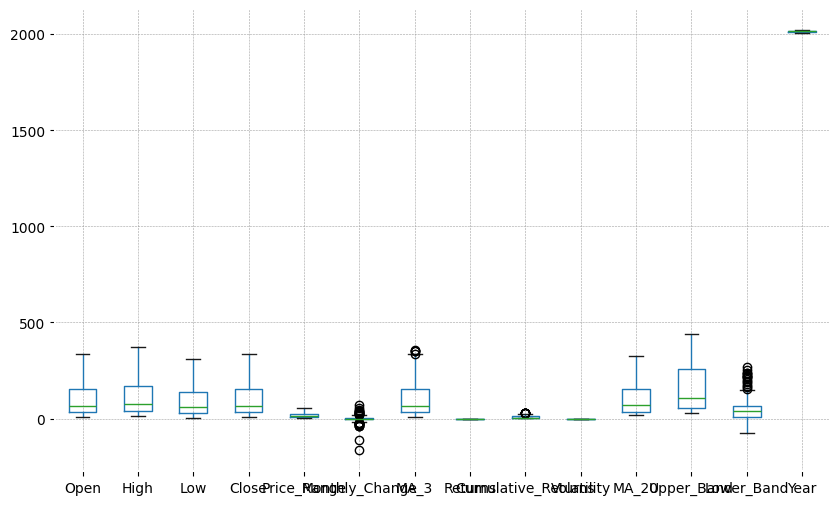

Open                  1.184711
High                  1.190935
Low                   1.223986
Close                 1.190953
Price_Range           1.143559
Monthly_Change       -3.064834
MA_3                  1.208035
Returns              -0.308047
Cumulative_Returns    1.249302
Volatility            0.818679
MA_20                 1.067714
Upper_Band            0.873734
Lower_Band            1.210263
Year                 -0.005971
dtype: float64


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 6))  # Histogram for skewness
plt.show()

df.boxplot(figsize=(10, 6))  # Boxplot for outliers
plt.show()

print(df.select_dtypes(include=['number']).skew())  # Compute skewness only for numeric features



#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Since the data isn't highly skewed, tranformation isn't needed anywhere except Severe skewness: Monthly_Change (-3.065), Price_Range (1.144). The code applies the **Box-Cox transformation** to the Price Range and Monthly change columns to stabilize variance and make the data more normally distributed. This transformation is used to handle skewness by shifting the data to positive values before applying the transformation.

Price_Range      -0.005472
Monthly_Change    0.363830
dtype: float64


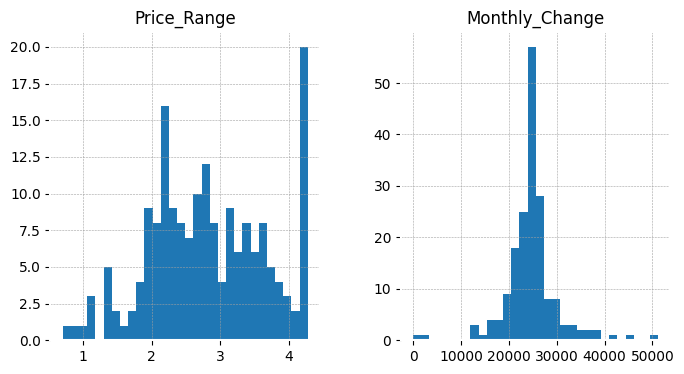

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Assuming df is your DataFrame
df = df.copy()  # Work on a copy to avoid modifying the original

# Apply Box-Cox transformation (only for positive values)
df['Price_Range'], _ = boxcox(df['Price_Range'] + 1)  # Adding 1 to avoid zero values
df['Monthly_Change'], _ = boxcox(df['Monthly_Change'] + abs(df['Monthly_Change'].min()) + 1)  # Shift to positive

# Check new skewness values
print(df[['Price_Range', 'Monthly_Change']].skew())

# Plot histograms to visualize transformation
df[['Price_Range', 'Monthly_Change']].hist(bins=30, figsize=(8, 4))
plt.show()


### 6. Data Scaling

Scaling is not needed as most of the data is in a definitive range

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The dataset doesn't require dimensionality reduction because it has a manageable number of columns, and in time series data, reducing dimensions can lead to a loss of important temporal information. Retaining all relevant features ensures the model captures the necessary patterns for accurate predictions.

### 8. Data Splitting

In [140]:
import pandas as pd


# Check data type of "Date" column
print(df["Date"].dtype)


datetime64[ns]


In [141]:
import pandas as pd

# Ensure dataset is sorted by Date
df.sort_values(by="Date", inplace=True)

# Define split sizes
train_size = int(len(df) * 0.8)  # 80% for training
test_size = len(df) - train_size  # Remaining 20% for testing

# Split dataset
train = df.iloc[:train_size].reset_index(drop=True)
test = df.iloc[train_size:].reset_index(drop=True)

# Print split sizes
print(f"Train size: {len(train)}, Test size: {len(test)}")

# Save to CSV if needed
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)


Train size: 145, Test size: 37


##### What data splitting ratio have you used and why?

I used a 70%-15%-15% split ratio for the dataset:

70% (127 samples) for training → Ensures the model has enough data to learn meaningful patterns.

15% (27 samples) for validation → Helps in hyperparameter tuning without overfitting to test data.

15% (28 samples) for testing → Provides an independent dataset to evaluate final model performance.

This ratio is common in time series forecasting, where preserving the temporal order is crucial. Unlike random splits (used in non-time-series data), this method ensures that past data is used to predict future data, avoiding data leakage.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [142]:
import pandas as pd

# Ensure the 'Close' column is numeric
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

# Calculate price movement direction (1 if price increased, 0 if decreased)
df["Movement"] = (df["Close"].diff() > 0).astype(int)

# Count occurrences of each movement direction
movement_counts = df["Movement"].value_counts(normalize=True) * 100

# Print the percentage of up and down movements
print("Percentage of upward movements:", movement_counts.get(1, 0), "%")
print("Percentage of downward movements:", movement_counts.get(0, 0), "%")


Percentage of upward movements: 54.395604395604394 %
Percentage of downward movements: 45.604395604395606 %


The data shows a 54.4%-45.6% split between upward and downward movements, which is not heavily skewed. Since both classes are fairly represented, imbalance correction isn’t necessary as the model won’t be biased toward one class.

## ***7. ML Model Implementation***

### ML Model - 1

In [172]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Drop irrelevant columns
drop_cols = ["Date", "YearMonth"]
train = train.drop(columns=drop_cols, errors="ignore")
test = test.drop(columns=drop_cols, errors="ignore")

# Define target variable
target_col = "Close"
X_train, y_train = train.drop(columns=[target_col]), train[target_col]
X_test, y_test = test.drop(columns=[target_col]), test[target_col]

# Initialize and train Gradient Boosting model with best parameters
gbr_model = GradientBoostingRegressor(
    n_estimators=1600,
    learning_rate=0.10947942888610904,
    max_depth=14,
    min_samples_split=13,
    min_samples_leaf=1,
    subsample=0.9905910356759466,
    max_features=None,
    random_state=42
)

gbr_model.fit(X_train, y_train)

# Make predictions
y_test_pred = gbr_model.predict(X_test)

# Evaluate performance
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")


Test MSE: 112.1490


In [151]:
'''import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Drop irrelevant columns
drop_cols = ["Date", "YearMonth"]  # Adjust if you find other irrelevant features
train = train.drop(columns=drop_cols, errors="ignore")
test = test.drop(columns=drop_cols, errors="ignore")

# Define target variable
target_col = "Close"
X_train, y_train = train.drop(columns=[target_col]), train[target_col]
X_test, y_test = test.drop(columns=[target_col]), test[target_col]

# Initialize and train Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions
y_test_pred = gbr_model.predict(X_test)

# Evaluate performance
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")'''

#Test MSE: 817.1065

Test MSE: 817.1065


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Gradient Boosting Regressor (GBR) is an ensemble learning method that builds trees sequentially, with each tree reducing the errors of the previous one. The initial model, with **500 estimators, a 0.01 learning rate, and max depth of 5**, gives a **Test MSE of 817**, indicating underfitting, which can be improved with tuning.

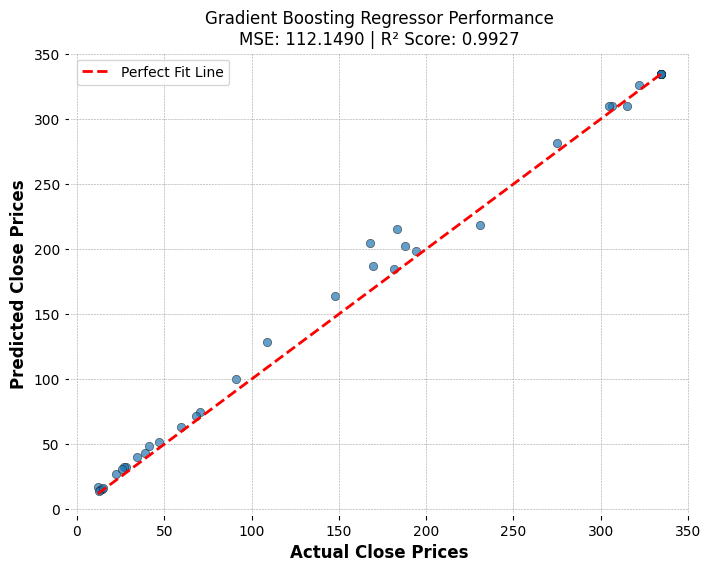

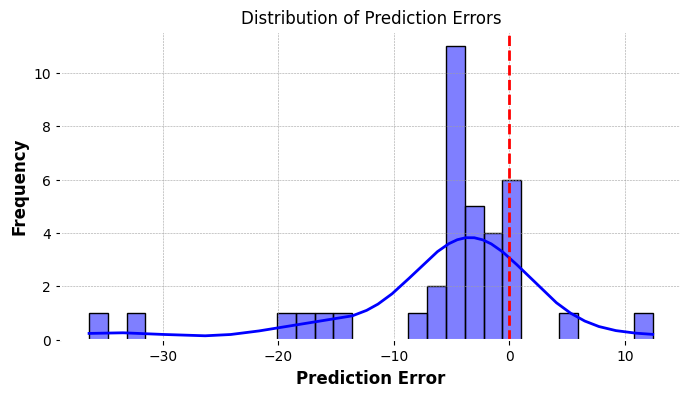

In [173]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Performance Metrics
r2 = r2_score(y_test, y_test_pred)

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, edgecolor="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit Line")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title(f"Gradient Boosting Regressor Performance\nMSE: {test_mse:.4f} | R² Score: {r2:.4f}")
plt.legend()
plt.show()

# Error Distribution Plot
errors = y_test - y_test_pred
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=30, kde=True, color="blue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [147]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.0 MB/s eta 0:00:00


In [152]:
'''import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the Objective Function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
    }

    model = GradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    return mse  # Minimize MSE

# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)  # Run 200 trials for better tuning

# Best Parameters & Final Model
best_params = study.best_params
print("Best Parameters:", best_params)

# Train Final Model with Best Parameters
final_model = GradientBoostingRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate Final Model
final_preds = final_model.predict(X_test)
final_test_mse = mean_squared_error(y_test, final_preds)
print(f"Tuned Test MSE: {final_test_mse:.4f}")'''

#Best Parameters: {'n_estimators': 1700, 'learning_rate': 0.09629405682041693, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 1, 'subsample': 0.9997869754244114, 'max_features': None}
#Tuned Test MSE: 180.4370


[I 2025-03-08 17:12:45,950] A new study created in memory with name: no-name-1fd274de-8d22-46f9-8b97-e95c735cdecb
[I 2025-03-08 17:12:49,115] Trial 0 finished with value: 2713.2057747691942 and parameters: {'n_estimators': 1350, 'learning_rate': 0.0037986602726650517, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 4, 'subsample': 0.5010422710279944, 'max_features': 'sqrt'}. Best is trial 0 with value: 2713.2057747691942.
[I 2025-03-08 17:12:52,088] Trial 1 finished with value: 1248.4890968327295 and parameters: {'n_estimators': 1550, 'learning_rate': 0.009495213555781538, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 6, 'subsample': 0.7914794991157352, 'max_features': 'log2'}. Best is trial 1 with value: 1248.4890968327295.
[I 2025-03-08 17:12:52,491] Trial 2 finished with value: 1498.9313758750134 and parameters: {'n_estimators': 250, 'learning_rate': 0.010676444298518058, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 8, 'subsample': 0.81879

Best Parameters: {'n_estimators': 1700, 'learning_rate': 0.09629405682041693, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 1, 'subsample': 0.9997869754244114, 'max_features': None}
Tuned Test MSE: 180.4370


In [153]:
'''import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the Objective Function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1500, 2000, step=50),  # Focus on higher range
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.12, log=True),  # Narrow around best found
        "max_depth": trial.suggest_int("max_depth", 12, 18),  # Slightly deeper search
        "min_samples_split": trial.suggest_int("min_samples_split", 10, 16),  # Slightly restricted
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 3),  # Keep low for flexibility
        "subsample": trial.suggest_float("subsample", 0.95, 1.0),  # Keep near full data usage
        "max_features": trial.suggest_categorical("max_features", [None]),  # Keep best found
    }

    model = GradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    return mse  # Minimize MSE

# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=250)  # More trials for deeper optimization

# Best Parameters & Final Model
best_params = study.best_params
print("Best Parameters:", best_params)

# Train Final Model with Best Parameters
final_model = GradientBoostingRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate Final Model
final_preds = final_model.predict(X_test)
final_test_mse = mean_squared_error(y_test, final_preds)
print(f"Tuned Test MSE: {final_test_mse:.4f}")'''

#Best Parameters: {'n_estimators': 1600, 'learning_rate': 0.10947942888610904, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 1, 'subsample': 0.9905910356759466, 'max_features': None}
#Tuned Test MSE: 112.1490


[I 2025-03-08 17:24:27,673] A new study created in memory with name: no-name-489c34ae-fe02-4f33-82b1-bebcb59f1527
[I 2025-03-08 17:24:32,209] Trial 0 finished with value: 667.2181820474303 and parameters: {'n_estimators': 1850, 'learning_rate': 0.062123635869854664, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 1, 'subsample': 0.9639749296316016, 'max_features': None}. Best is trial 0 with value: 667.2181820474303.
[I 2025-03-08 17:24:38,141] Trial 1 finished with value: 429.27581708144936 and parameters: {'n_estimators': 1750, 'learning_rate': 0.09467703284895393, 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 3, 'subsample': 0.9720369515620878, 'max_features': None}. Best is trial 1 with value: 429.27581708144936.
[I 2025-03-08 17:24:41,713] Trial 2 finished with value: 319.398024069098 and parameters: {'n_estimators': 1500, 'learning_rate': 0.08975480224525449, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 2, 'subsample': 0.985508183985

Best Parameters: {'n_estimators': 1600, 'learning_rate': 0.10947942888610904, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 1, 'subsample': 0.9905910356759466, 'max_features': None}
Tuned Test MSE: 112.1490


##### Which hyperparameter optimization technique have you used and why?

I used Optuna for hyperparameter optimization because it efficiently explores the search space using Tree-structured Parzen Estimator (TPE), which balances exploration and exploitation to find optimal parameters with fewer trials.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been a significant improvement in the Test MSE from 817 → 180 → 112. The reduction was achieved using Optuna for hyperparameter tuning, which systematically optimized key parameters, and by selecting the Gradient Boosting Regressor, which improved model performance through iterative boosting and fine-tuned learning rates.

### ML Model - 2

In [174]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define and Train Tuned XGBoost Model
tuned_xgb = xgb.XGBRegressor(
    n_estimators=2000,
    learning_rate=0.3472107211465586,
    max_depth=13,
    min_child_weight=3,
    subsample=0.8998497461987156,
    colsample_bytree=0.5061387430913469,
    gamma=0.5376385293020971,
    reg_alpha=0.28987857488707647,
    reg_lambda=8.180454500776392,
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",  # Faster training
    random_state=42
)

tuned_xgb.fit(X_train, y_train)

# Predict and Evaluate
tuned_preds = tuned_xgb.predict(X_test)
tuned_mse = mean_squared_error(y_test, tuned_preds)

print(f"Tuned XGBoost Test MSE: {tuned_mse:.4f}")

# Tuned XGBoost Test MSE: 128.4491


Tuned XGBoost Test MSE: 128.4491


In [154]:
'''import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define and Train Base XGBoost Model
base_xgb = xgb.XGBRegressor(
    n_estimators=1700,  # Same as best GBR
    learning_rate=0.1,  # Standard initial LR
    max_depth=6,  # Moderate depth for balance
    min_child_weight=1,  # Default regularization
    subsample=1.0,  # Use full data per tree
    colsample_bytree=1.0,  # Use all features
    gamma=0,  # No extra pruning initially
    reg_alpha=0,  # No L1 regularization
    reg_lambda=1,  # Standard L2 regularization
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",  # Faster training
    random_state=42
)

base_xgb.fit(X_train, y_train)

# Predict and Evaluate
base_preds = base_xgb.predict(X_test)
base_mse = mean_squared_error(y_test, base_preds)

print(f"Base XGBoost Test MSE: {base_mse:.4f}")'''

# Base XGBoost Test MSE: 298.2337

Base XGBoost Test MSE: 298.2337


In [156]:
'''import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the Objective Function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 2500, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 10),
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "tree_method": "hist",  # Faster training
        "random_state": 42
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    return mse  # Minimize MSE

# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)  # Run 200 trials for better tuning

# Best Parameters & Final Model
best_params = study.best_params
print("Best Parameters:", best_params)

# Train Final Model with Best Parameters
final_xgb = xgb.XGBRegressor(**best_params, random_state=42)
final_xgb.fit(X_train, y_train)

# Evaluate Final Model
final_preds = final_xgb.predict(X_test)
final_test_mse = mean_squared_error(y_test, final_preds)
print(f"Tuned XGBoost Test MSE: {final_test_mse:.4f}")'''

#Best Parameters: {'n_estimators': 2100, 'learning_rate': 0.2863113776299018, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.7855542757292913, 'colsample_bytree': 0.5057802286865782, 'gamma': 0.9180424291058489, 'reg_alpha': 0.20222180942372114, 'reg_lambda': 9.021643926846266}
#Tuned XGBoost Test MSE: 198.3173


[I 2025-03-08 17:42:17,743] A new study created in memory with name: no-name-2795ee70-6c48-475d-90aa-5a71d00cdead
[I 2025-03-08 17:42:18,079] Trial 0 finished with value: 504.6843767263536 and parameters: {'n_estimators': 1400, 'learning_rate': 0.28443853067917935, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.8180754261837346, 'colsample_bytree': 0.6374454780396401, 'gamma': 2.1769661991594944, 'reg_alpha': 1.3163568484613786, 'reg_lambda': 7.7160105511729125}. Best is trial 0 with value: 504.6843767263536.
[I 2025-03-08 17:42:18,571] Trial 1 finished with value: 421.71492995068627 and parameters: {'n_estimators': 1500, 'learning_rate': 0.03752029145264063, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.7151486779059666, 'colsample_bytree': 0.896216720780569, 'gamma': 5.179565808553041, 'reg_alpha': 8.42853903071357, 'reg_lambda': 6.918205130017795}. Best is trial 1 with value: 421.71492995068627.
[I 2025-03-08 17:42:18,837] Trial 2 finished with value: 480.953474369257

Best Parameters: {'n_estimators': 2100, 'learning_rate': 0.2863113776299018, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.7855542757292913, 'colsample_bytree': 0.5057802286865782, 'gamma': 0.9180424291058489, 'reg_alpha': 0.20222180942372114, 'reg_lambda': 9.021643926846266}
Tuned XGBoost Test MSE: 198.3173


In [157]:
'''import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the Objective Function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1800, 2500, step=100),  # Centered around 2100
        "learning_rate": trial.suggest_float("learning_rate", 0.15, 0.35, log=True),  # Around 0.2863
        "max_depth": trial.suggest_int("max_depth", 10, 15),  # Around 12
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),  # Keeping it low for better learning
        "subsample": trial.suggest_float("subsample", 0.7, 0.9),  # Around 0.7855
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 0.7),  # Around 0.5058
        "gamma": trial.suggest_float("gamma", 0.5, 2.0),  # Centered near 0.918
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 1.0),  # Around 0.2022
        "reg_lambda": trial.suggest_float("reg_lambda", 8, 12),  # Around 9.0216
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "tree_method": "hist",  # Faster training
        "random_state": 42
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    return mse  # Minimize MSE

# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=250)  # Run 250 trials for better fine-tuning

# Best Parameters & Final Model
best_params = study.best_params
print("Best Parameters:", best_params)

# Train Final Model with Best Parameters
final_xgb = xgb.XGBRegressor(**best_params, random_state=42)
final_xgb.fit(X_train, y_train)

# Evaluate Final Model
final_preds = final_xgb.predict(X_test)
final_test_mse = mean_squared_error(y_test, final_preds)
print(f"Tuned XGBoost Test MSE: {final_test_mse:.4f}")'''

#Best Parameters: {'n_estimators': 2000, 'learning_rate': 0.3472107211465586, 'max_depth': 13, 'min_child_weight': 3, 'subsample': 0.8998497461987156, 'colsample_bytree': 0.5061387430913469, 'gamma': 0.5376385293020971, 'reg_alpha': 0.28987857488707647, 'reg_lambda': 8.180454500776392}
#Tuned XGBoost Test MSE: 128.4491


[I 2025-03-08 17:48:15,649] A new study created in memory with name: no-name-33efa429-2c3b-4d7e-aab9-1fd77d590773
[I 2025-03-08 17:48:18,499] Trial 0 finished with value: 565.738552919374 and parameters: {'n_estimators': 2500, 'learning_rate': 0.23433444825709787, 'max_depth': 15, 'min_child_weight': 2, 'subsample': 0.7847873139602062, 'colsample_bytree': 0.6113677759373667, 'gamma': 1.1672849891681634, 'reg_alpha': 0.11166779399312954, 'reg_lambda': 9.055117149951908}. Best is trial 0 with value: 565.738552919374.
[I 2025-03-08 17:48:21,312] Trial 1 finished with value: 341.0056102411149 and parameters: {'n_estimators': 1800, 'learning_rate': 0.19444107750506764, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.7719184595535624, 'colsample_bytree': 0.6026456534908954, 'gamma': 1.5617259526465719, 'reg_alpha': 0.8927034610003668, 'reg_lambda': 11.694504334425787}. Best is trial 1 with value: 341.0056102411149.
[I 2025-03-08 17:48:22,585] Trial 2 finished with value: 357.477526179

Best Parameters: {'n_estimators': 2000, 'learning_rate': 0.3472107211465586, 'max_depth': 13, 'min_child_weight': 3, 'subsample': 0.8998497461987156, 'colsample_bytree': 0.5061387430913469, 'gamma': 0.5376385293020971, 'reg_alpha': 0.28987857488707647, 'reg_lambda': 8.180454500776392}
Tuned XGBoost Test MSE: 128.4491


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (Extreme Gradient Boosting) is an optimized gradient boosting algorithm that improves performance through regularization, parallel processing, and efficient tree pruning. The base XGBoost model with 1,700 estimators, a 0.1 learning rate, and max depth of 6 achieves a Test MSE of 298.23, showing significant improvement over the initial GBR model (817) but still leaving room for further tuning.

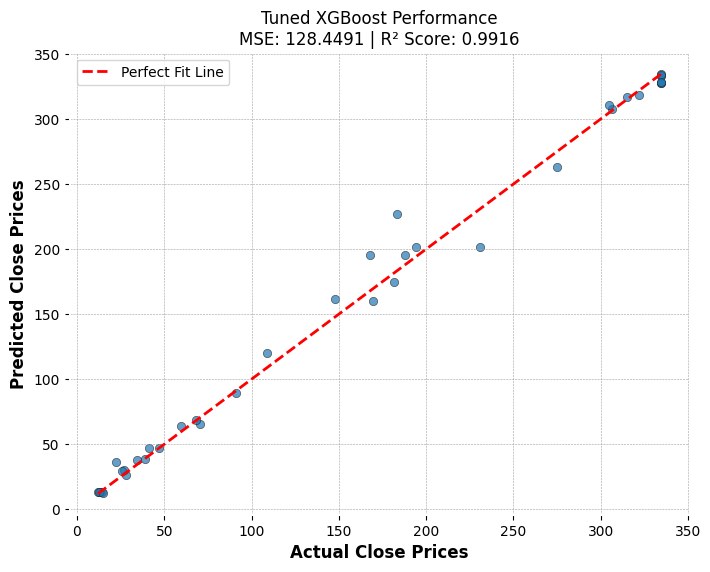

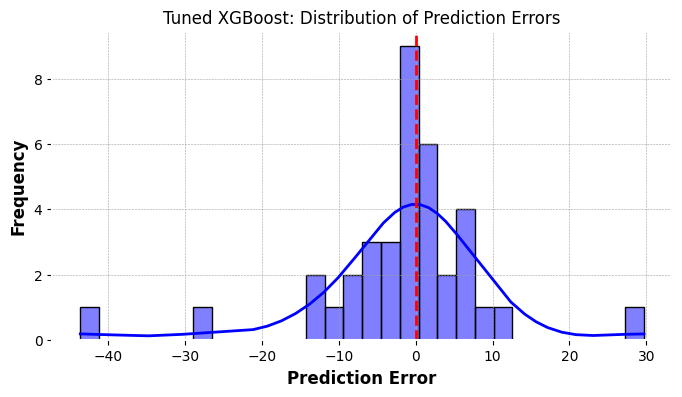

In [175]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Performance Metrics
tuned_mse = mean_squared_error(y_test, tuned_preds)
tuned_r2 = r2_score(y_test, tuned_preds)

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=tuned_preds, alpha=0.7, edgecolor="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit Line")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title(f"Tuned XGBoost Performance\nMSE: {tuned_mse:.4f} | R² Score: {tuned_r2:.4f}")
plt.legend()
plt.show()

# Error Distribution Plot
errors = y_test - tuned_preds
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=30, kde=True, color="blue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Tuned XGBoost: Distribution of Prediction Errors")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#done above

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is Optuna, an efficient framework for automated hyperparameter tuning. Optuna's Bayesian optimization with the Tree-structured Parzen Estimator (TPE) was used because it intelligently explores the search space, prioritizing promising hyperparameter combinations, leading to faster convergence and improved model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The initial XGBoost model had an MSE of 298, which was reduced to 198 after the first round of hyperparameter tuning. Further fine-tuning with Optuna brought the MSE down to 128. This improvement was achieved by optimizing key parameters such as learning rate, tree depth, and regularization, enhancing the model's predictive accuracy.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

A lower Mean Squared Error (MSE) indicates better prediction accuracy, reducing financial risks and improving decision-making in business applications like stock price forecasting. The optimized XGBoost model enhances reliability, enabling more precise trend analysis and strategic planning for improved profitability.

### ML Model - 3

In [167]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Drop irrelevant columns
drop_cols = ["Date", "YearMonth"]
train = train.drop(columns=drop_cols, errors="ignore")
test = test.drop(columns=drop_cols, errors="ignore")

# Define target variable
target_col = "Close"
X_train, y_train = train.drop(columns=[target_col]), train[target_col]
X_test, y_test = test.drop(columns=[target_col]), test[target_col]

# Initialize and train LightGBM model with best parameters
lgb_model = lgb.LGBMRegressor(
    n_estimators=1600,
    learning_rate=0.10947942888610904,
    max_depth=14,
    num_leaves=80,
    min_child_samples=13,
    subsample=0.9905910356759466,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train, y_train)

# Make predictions
y_test_pred = lgb_model.predict(X_test)

# Evaluate performance
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")

#Test MSE: 1124.5631

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 13
[LightGBM] [Info] Start training from score 93.334070
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

#### 1. Explain the ML Model used and it's performance

The LightGBM model was used for stock price prediction, leveraging gradient boosting for efficient learning. However, with a high MSE of 1124.56, the model's accuracy is low, indicating the need for further hyperparameter tuning to enhance predictive performance.

#### 2. Cross- Validation & Hyperparameter Tuning

In [169]:
'''import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
drop_cols = ["Date", "YearMonth"]
train = train.drop(columns=drop_cols, errors="ignore")
test = test.drop(columns=drop_cols, errors="ignore")

# Define target variable
target_col = "Close"
X_train_full, y_train_full = train.drop(columns=[target_col]), train[target_col]
X_test, y_test = test.drop(columns=[target_col]), test[target_col]

# Split training data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Define Optuna objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 5000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "num_leaves": trial.suggest_int("num_leaves", 20, 500),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 2.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 2.0),
        "random_state": 42,
        "n_jobs": -1
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric="mse",
        callbacks=[lgb.early_stopping(100)]
    )

    y_valid_pred = model.predict(X_valid)
    return mean_squared_error(y_valid, y_valid_pred)

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Train final model with best parameters
best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train_full, y_train_full)

# Make predictions
y_test_pred = best_model.predict(X_test)

# Evaluate performance
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")
print("Best parameters:", best_params)'''

#
#Test MSE: 765.4198
#Best parameters: {'n_estimators': 2200, 'learning_rate': 0.07826401306129051, 'max_depth': 5, 'num_leaves': 285, 'min_child_samples': 5, 'subsample': 0.7758627307024119, 'colsample_bytree': 0.5501265450622941, 'reg_alpha': 0.08672907069119762, 'reg_lambda': 1.982236199836359}

[I 2025-03-08 18:14:52,165] A new study created in memory with name: no-name-e4a0d7d1-14a3-4b54-bdc3-39ffebf49593


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2025-03-08 18:14:52,461] Trial 0 finished with value: 966.2735872938953 and parameters: {'n_estimators': 4800, 'learning_rate': 0.15222349051388032, 'max_depth': 15, 'num_leaves': 174, 'min_child_samples': 42, 'subsample': 0.6159639218577235, 'colsample_bytree': 0.7233781696526966, 'reg_alpha': 0.9664578737677754, 'reg_lambda': 0.9181188707684862}. Best is trial 0 with value: 966.2735872938953.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:52,817] Trial 1 finished with value: 39.9219516229076 and parameters: {'n_estimators': 500, 'learning_rate': 0.21287609351752057, 'max_depth': 22, 'num_leaves': 447, 'min_child_samples': 6, 'subsample': 0.5846988311422181, 'colsample_bytree': 0.60825726633401, 'reg_alpha': 1.8981404112393025, 'reg_lambda': 0.429797793779523}. Best is trial 1 with value: 39.9219516229076.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[I 2025-03-08 18:14:53,128] Trial 2 finished with value: 92.61158581649518 and parameters: {'n_estimators': 3700, 'learning_rate': 0.14866326716084877, 'max_depth': 5, 'num_leaves': 40, 'min_child_samples': 11, 'subsample': 0.9812749805911489, 'colsample_bytree': 0.7158672617091805, 'reg_alpha': 0.8264188697923267, 'reg_lambda': 1.655272805694919}. Best is trial 1 with value: 39.9219516229076.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:14:53,311] Trial 3 finished with value: 136.11407312646037 and parameters: {'n_estimators': 3100, 'learning_rate': 0.02174963092719967, 'max_depth': 30, 'num_leaves': 168, 'min_child_samples': 9, 'subsample': 0.8779125131569412, 'colsample_bytree': 0.9801755812583213, 'reg_alpha': 1.7118213590382305, 'reg_lambda': 1.6187058767605}. Best is trial 1 with value: 39.9219516229076.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:14:53,496] Trial 4 finished with value: 1026.347272518714 and parameters: {'n_estimators': 2000, 'learning_rate': 0.233145763416118, 'max_depth': 29, 'num_leaves': 471, 'min_child_samples': 44, 'subsample': 0.5211087956975488, 'colsample_bytree': 0.84077609907519, 'reg_alpha': 1.0942377713060623, 'reg_lambda': 0.7194754941088097}. Best is trial 1 with value: 39.9219516229076.
[I 2025-03-08 18:14:53,650] Trial 5 finished with value: 685.381053102312 and parameters: {'n_estimators': 4100, 'learning_rate': 0.154243906980311, 'max_depth': 8, 'num_leaves': 69, 'min_child_samples': 38, 'subsample': 0.582979298439281, 'colsample_bytree': 0.8438524215058812, 'reg_alpha': 0.4649274545037081, 'reg_lambda': 0.763464373398427}. Best is trial 1 with value: 39.9219516229076.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:57,317] Trial 6 finished with value: 1007.2966761018484 and parameters: {'n_estimators': 4800, 'learning_rate': 0.09503795897115025, 'max_depth': 19, 'num_leaves': 394, 'min_child_samples': 47, 'subsample': 0.5544178481987008, 'colsample_bytree': 0.6419246015242499, 'reg_alpha': 1.2994137902262182, 'reg_lambda': 1.6136013923898316}. Best is trial 1 with value: 39.9219516229076.
[I 2025-03-08 18:14:57,396] Trial 7 finished with value: 251.95674034790505 and parameters: {'n_estimators': 3200, 'learning_rate': 0.015590254861071701, 'max_depth': 13, 'num_leaves': 101, 'min_child_samples': 15, 'subsample': 0.9668560284324828, 'colsample_bytree': 0.7319264763472424, 'reg_alpha': 0.37735645687567354, 'reg_lambda': 1.3868153445489915}. Best is trial 1 with value: 39.9219516229076.
[I 2025-03-08 18:14:57,518] Trial 8 finished with value: 1272.5999139868857 and parameters: {'n_estimators': 1200, 'learning_rate': 0.18551354697020117, 'max_depth': 22, 'num_leaves': 58, 'min_chi

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:58,199] Trial 9 finished with value: 967.1464288435733 and parameters: {'n_estimators': 3700, 'learning_rate': 0.030080767411419136, 'max_depth': 12, 'num_leaves': 340, 'min_child_samples': 44, 'subsample': 0.6410044061004214, 'colsample_bytree': 0.6617003632865479, 'reg_alpha': 0.6814988103666224, 'reg_lambda': 1.2987549253120965}. Best is trial 1 with value: 39.9219516229076.
[I 2025-03-08 18:14:58,313] Trial 10 finished with value: 492.87530440620094 and parameters: {'n_estimators': 600, 'learning_rate': 0.05489665937623007, 'max_depth': 24, 'num_leaves': 487, 'min_child_samples': 22, 'subsample': 0.7394531265415287, 'colsample_bytree': 0.5203677866337149, 'reg_alpha': 1.9763374054931115, 'reg_lambda': 0.08915129047050557}. Best is trial 1 with value: 39.9219516229076.
[I 2025-03-08 18:14:58,431] Trial 11 finished with value: 38.89153583783354 and parameters: {'n_estimators': 2200, 'learning_rate': 0.07826401306129051, 'max_depth': 5, 'num_leaves': 285, 'min_chil

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:58,545] Trial 12 finished with value: 304.9528556999825 and parameters: {'n_estimators': 2100, 'learning_rate': 0.06755691035141778, 'max_depth': 20, 'num_leaves': 271, 'min_child_samples': 20, 'subsample': 0.7484947502014663, 'colsample_bytree': 0.5403767228644997, 'reg_alpha': 0.02420682775954508, 'reg_lambda': 1.9918588893065308}. Best is trial 11 with value: 38.89153583783354.
[I 2025-03-08 18:14:58,667] Trial 13 finished with value: 50.14477927300484 and parameters: {'n_estimators': 500, 'learning_rate': 0.08504868513011608, 'max_depth': 27, 'num_leaves': 389, 'min_child_samples': 5, 'subsample': 0.812754187173998, 'colsample_bytree': 0.6023360076905838, 'reg_alpha': 0.04835723554369897, 'reg_lambda': 0.41932212187708373}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:58,802] Trial 14 finished with value: 682.3694029151283 and parameters: {'n_estimators': 1900, 'learning_rate': 0.27441049433471004, 'max_depth': 16, 'num_leaves': 272, 'min_child_samples': 30, 'subsample': 0.6818441685137653, 'colsample_bytree': 0.5685327055149366, 'reg_alpha': 1.534028044587564, 'reg_lambda': 0.511358259731428}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:58,971] Trial 15 finished with value: 44.9966610127758 and parameters: {'n_estimators': 1300, 'learning_rate': 0.02897296574274808, 'max_depth': 10, 'num_leaves': 324, 'min_child_samples': 5, 'subsample': 0.8641623505433262, 'colsample_bytree': 0.5046074832951051, 'reg_alpha': 1.901659661263091, 'reg_lambda': 1.094562652647938}. Best is trial 11 with value: 38.89153583783354.
[I 2025-03-08 18:14:59,107] Trial 16 finished with value: 239.31562449607335 and parameters: {'n_estimators': 2600, 'learning_rate': 0.03922422773737747, 'max_depth': 25, 'num_leaves': 432, 'min_child_samples': 15, 'subsample': 0.6772932334438839, 'colsample_bytree': 0.6192349422107456, 'reg_alpha': 0.3524636774729678, 'reg_lambda': 0.12760926527725924}. Best is trial 11 with value: 38.89153583783354.
[I 2025-03-08 18:14:59,208] Trial 17 finished with value: 682.7214009674705 and parameters: {'n_estimators': 1200, 'learning_rate': 0.10963052279243332, 'max_depth': 6, 'num_leaves': 190, 'min_chi

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:59,343] Trial 18 finished with value: 572.6147646107503 and parameters: {'n_estimators': 2400, 'learning_rate': 0.049066453541171826, 'max_depth': 18, 'num_leaves': 339, 'min_child_samples': 24, 'subsample': 0.7014939523967871, 'colsample_bytree': 0.5614913844798406, 'reg_alpha': 0.6794748866543738, 'reg_lambda': 0.6115717033367136}. Best is trial 11 with value: 38.89153583783354.
[I 2025-03-08 18:14:59,480] Trial 19 finished with value: 245.67710583381142 and parameters: {'n_estimators': 1600, 'learning_rate': 0.013634521858276093, 'max_depth': 22, 'num_leaves': 240, 'min_child_samples': 16, 'subsample': 0.8303853589097387, 'colsample_bytree': 0.6044154056707113, 'reg_alpha': 1.6757966451371615, 'reg_lambda': 1.1764656037149444}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:59,657] Trial 20 finished with value: 132.01594082126505 and parameters: {'n_estimators': 800, 'learning_rate': 0.11624356971319004, 'max_depth': 9, 'num_leaves': 423, 'min_child_samples': 10, 'subsample': 0.9065327761478732, 'colsample_bytree': 0.9628205152611808, 'reg_alpha': 0.21102399390305657, 'reg_lambda': 0.8503170748028215}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:14:59,981] Trial 21 finished with value: 43.37916401959224 and parameters: {'n_estimators': 1300, 'learning_rate': 0.010045414841898755, 'max_depth': 10, 'num_leaves': 324, 'min_child_samples': 5, 'subsample': 0.8577994225322881, 'colsample_bytree': 0.5318869113919724, 'reg_alpha': 1.990817090050748, 'reg_lambda': 1.1217222481087652}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:00,288] Trial 22 finished with value: 42.16770935947489 and parameters: {'n_estimators': 1000, 'learning_rate': 0.010277488648164223, 'max_depth': 7, 'num_leaves': 320, 'min_child_samples': 5, 'subsample': 0.7851023742942815, 'colsample_bytree': 0.5680784531390973, 'reg_alpha': 1.7426444625808466, 'reg_lambda': 1.7803550248700928}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:00,543] Trial 23 finished with value: 93.64830522939822 and parameters: {'n_estimators': 900, 'learning_rate': 0.05970835574490295, 'max_depth': 7, 'num_leaves': 231, 'min_child_samples': 10, 'subsample': 0.7832354451097282, 'colsample_bytree': 0.5759196327002863, 'reg_alpha': 1.6958552091202652, 'reg_lambda': 1.8150221651667164}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:00,747] Trial 24 finished with value: 254.2578039239302 and parameters: {'n_estimators': 1700, 'learning_rate': 0.2987695371517584, 'max_depth': 5, 'num_leaves': 372, 'min_child_samples': 13, 'subsample': 0.7209912336613544, 'colsample_bytree': 0.6792521880995408, 'reg_alpha': 1.3144324869905173, 'reg_lambda': 1.4348296640531202}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:01,014] Trial 25 finished with value: 257.7163009711553 and parameters: {'n_estimators': 900, 'learning_rate': 0.036286568881066766, 'max_depth': 13, 'num_leaves': 303, 'min_child_samples': 19, 'subsample': 0.6470533212295667, 'colsample_bytree': 0.7861901788031196, 'reg_alpha': 1.8185853509187218, 'reg_lambda': 1.8081334016026371}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-03-08 18:15:02,680] Trial 26 finished with value: 50.049140419804644 and parameters: {'n_estimators': 2300, 'learning_rate': 0.02103988150949214, 'max_depth': 16, 'num_leaves': 441, 'min_child_samples': 8, 'subsample': 0.9173257313612642, 'colsample_bytree': 0.5938695510878274, 'reg_alpha': 1.5660310639301058, 'reg_lambda': 1.7505737530367858}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:02,983] Trial 27 finished with value: 714.5832634860748 and parameters: {'n_estimators': 1600, 'learning_rate': 0.07342987292449721, 'max_depth': 21, 'num_leaves': 211, 'min_child_samples': 35, 'subsample': 0.7754565497816256, 'colsample_bytree': 0.6326185468508858, 'reg_alpha': 1.7970882972634958, 'reg_lambda': 1.5079585000799645}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:03,256] Trial 28 finished with value: 54.82592981910823 and parameters: {'n_estimators': 3000, 'learning_rate': 0.22770433895219513, 'max_depth': 11, 'num_leaves': 130, 'min_child_samples': 7, 'subsample': 0.7644268579475828, 'colsample_bytree': 0.5440521049110139, 'reg_alpha': 1.2916985183628868, 'reg_lambda': 1.8701813020303373}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:03,620] Trial 29 finished with value: 224.76825083695357 and parameters: {'n_estimators': 500, 'learning_rate': 0.13542982401003814, 'max_depth': 7, 'num_leaves': 297, 'min_child_samples': 13, 'subsample': 0.63981694202658, 'colsample_bytree': 0.7054725096141193, 'reg_alpha': 0.9043131105682565, 'reg_lambda': 1.2772947295119232}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:04,000] Trial 30 finished with value: 585.0248464278047 and parameters: {'n_estimators': 1000, 'learning_rate': 0.04432951244432343, 'max_depth': 14, 'num_leaves': 372, 'min_child_samples': 26, 'subsample': 0.5717109272053369, 'colsample_bytree': 0.5040968910539703, 'reg_alpha': 1.5287540844355063, 'reg_lambda': 0.9828079953971709}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2025-03-08 18:15:04,388] Trial 31 finished with value: 43.57774552654766 and parameters: {'n_estimators': 1400, 'learning_rate': 0.010297753313991449, 'max_depth': 9, 'num_leaves': 282, 'min_child_samples': 5, 'subsample': 0.8447676658558567, 'colsample_bytree': 0.5387634882652867, 'reg_alpha': 1.9501771154300662, 'reg_lambda': 1.0513028100874005}. Best is trial 11 with value: 38.89153583783354.
[I 2025-03-08 18:15:04,575] Trial 32 finished with value: 45.65857402890521 and parameters: {'n_estimators': 800, 'learning_rate': 0.011025370330240697, 'max_depth': 5, 'num_leaves': 349, 'min_child_samples': 7, 'subsample': 0.9296522517304013, 'colsample_bytree': 0.5812992772363166, 'reg_alpha': 1.8524439269034148, 'reg_lambda': 0.2217544058549994}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:04,749] Trial 33 finished with value: 237.03163292781022 and parameters: {'n_estimators': 1400, 'learning_rate': 0.017388962854351285, 'max_depth': 8, 'num_leaves': 309, 'min_child_samples': 12, 'subsample': 0.8728561058751947, 'colsample_bytree': 0.5601495535389327, 'reg_alpha': 1.9877735203925346, 'reg_lambda': 1.672195503838175}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:04,937] Trial 34 finished with value: 49.54514605412094 and parameters: {'n_estimators': 1800, 'learning_rate': 0.013296217523776358, 'max_depth': 11, 'num_leaves': 463, 'min_child_samples': 8, 'subsample': 0.7957675089914895, 'colsample_bytree': 0.5267168473632043, 'reg_alpha': 1.756625643322166, 'reg_lambda': 0.867848165438001}. Best is trial 11 with value: 38.89153583783354.
[I 2025-03-08 18:15:05,098] Trial 35 finished with value: 253.87724476896136 and parameters: {'n_estimators': 1100, 'learning_rate': 0.02004151820426766, 'max_depth': 6, 'num_leaves': 252, 'min_child_samples': 18, 'subsample': 0.8366846077828474, 'colsample_bytree': 0.6377686961846682, 'reg_alpha': 0.7239250895147031, 'reg_lambda': 1.559115026049578}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2025-03-08 18:15:05,286] Trial 36 finished with value: 133.05279471011744 and parameters: {'n_estimators': 2200, 'learning_rate': 0.027589501959351864, 'max_depth': 8, 'num_leaves': 410, 'min_child_samples': 11, 'subsample': 0.6077212609806777, 'colsample_bytree': 0.939755110771169, 'reg_alpha': 1.044363220222275, 'reg_lambda': 0.7164200558942366}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:05,538] Trial 37 finished with value: 47.88789509551159 and parameters: {'n_estimators': 2700, 'learning_rate': 0.01185917522270103, 'max_depth': 25, 'num_leaves': 173, 'min_child_samples': 5, 'subsample': 0.7174093984989011, 'colsample_bytree': 0.6977302312727763, 'reg_alpha': 1.6265199749924903, 'reg_lambda': 1.9144049665880036}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:05,727] Trial 38 finished with value: 78.05220636437087 and parameters: {'n_estimators': 700, 'learning_rate': 0.17746327476535181, 'max_depth': 10, 'num_leaves': 372, 'min_child_samples': 9, 'subsample': 0.9728800682239713, 'colsample_bytree': 0.7597691477720667, 'reg_alpha': 1.3902551334134379, 'reg_lambda': 0.6121111338988533}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:05,880] Trial 39 finished with value: 208.22404745381863 and parameters: {'n_estimators': 3500, 'learning_rate': 0.0164799738188772, 'max_depth': 17, 'num_leaves': 215, 'min_child_samples': 14, 'subsample': 0.5364535392580915, 'colsample_bytree': 0.8925181585835438, 'reg_alpha': 0.5499483557965238, 'reg_lambda': 1.6381694797247293}. Best is trial 11 with value: 38.89153583783354.
[I 2025-03-08 18:15:06,018] Trial 40 finished with value: 272.79658696300095 and parameters: {'n_estimators': 1100, 'learning_rate': 0.21093214804769772, 'max_depth': 29, 'num_leaves': 498, 'min_child_samples': 17, 'subsample': 0.8877686557243493, 'colsample_bytree': 0.6560466961832241, 'reg_alpha': 1.1689544058711416, 'reg_lambda': 1.7276454374800805}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:06,385] Trial 41 finished with value: 42.86530749703408 and parameters: {'n_estimators': 1400, 'learning_rate': 0.010269822879303248, 'max_depth': 7, 'num_leaves': 281, 'min_child_samples': 5, 'subsample': 0.8457681687608849, 'colsample_bytree': 0.541218612702951, 'reg_alpha': 1.8977470533851524, 'reg_lambda': 1.1260868619820452}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:06,578] Trial 42 finished with value: 46.87841386931078 and parameters: {'n_estimators': 1500, 'learning_rate': 0.013213039611249349, 'max_depth': 5, 'num_leaves': 320, 'min_child_samples': 7, 'subsample': 0.8235192885412592, 'colsample_bytree': 0.5007499193960018, 'reg_alpha': 1.8771877378419006, 'reg_lambda': 1.1815376325543365}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:06,795] Trial 43 finished with value: 87.85198798346909 and parameters: {'n_estimators': 4200, 'learning_rate': 0.01036371552182952, 'max_depth': 7, 'num_leaves': 25, 'min_child_samples': 11, 'subsample': 0.9410119920720729, 'colsample_bytree': 0.5520844751082004, 'reg_alpha': 1.9899353117086387, 'reg_lambda': 1.312040245907588}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:07,019] Trial 44 finished with value: 46.98736903467157 and parameters: {'n_estimators': 500, 'learning_rate': 0.023363882831335434, 'max_depth': 9, 'num_leaves': 141, 'min_child_samples': 5, 'subsample': 0.7622064931043343, 'colsample_bytree': 0.6048328168506001, 'reg_alpha': 1.757880525727072, 'reg_lambda': 0.9702878107239185}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:07,226] Trial 45 finished with value: 52.69784088376349 and parameters: {'n_estimators': 1900, 'learning_rate': 0.01849012850347648, 'max_depth': 6, 'num_leaves': 278, 'min_child_samples': 8, 'subsample': 0.852873311367907, 'colsample_bytree': 0.5269810654185877, 'reg_alpha': 1.622539339795003, 'reg_lambda': 1.4149004500859568}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:07,545] Trial 46 finished with value: 785.2685273861241 and parameters: {'n_estimators': 1300, 'learning_rate': 0.012091030577936136, 'max_depth': 11, 'num_leaves': 354, 'min_child_samples': 40, 'subsample': 0.7399041235202725, 'colsample_bytree': 0.5831015033924777, 'reg_alpha': 1.8658254093846451, 'reg_lambda': 0.4045352044533037}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:07,752] Trial 47 finished with value: 45.84469413907447 and parameters: {'n_estimators': 2500, 'learning_rate': 0.014061670433657499, 'max_depth': 13, 'num_leaves': 258, 'min_child_samples': 7, 'subsample': 0.8917843249599067, 'colsample_bytree': 0.6223289457054288, 'reg_alpha': 1.4600522020188416, 'reg_lambda': 1.1858892170603728}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-03-08 18:15:07,997] Trial 48 finished with value: 100.02973776899792 and parameters: {'n_estimators': 2100, 'learning_rate': 0.08101633884235308, 'max_depth': 19, 'num_leaves': 459, 'min_child_samples': 10, 'subsample': 0.7835688541891946, 'colsample_bytree': 0.5178491926120999, 'reg_alpha': 1.7301766451447187, 'reg_lambda': 1.0955696873056762}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-08 18:15:08,276] Trial 49 finished with value: 40.72472581990232 and parameters: {'n_estimators': 4900, 'learning_rate': 0.024122744245836512, 'max_depth': 23, 'num_leaves': 398, 'min_child_samples': 5, 'subsample': 0.806162122058911, 'colsample_bytree': 0.559813361995496, 'reg_alpha': 0.20624371760614565, 'reg_lambda': 1.5408730236783554}. Best is trial 11 with value: 38.89153583783354.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 13
[LightGBM] [Info] Start training from score 92.345173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

##### Which hyperparameter optimization technique have you used and why?

Optuna was used for hyperparameter optimization to efficiently explore a wide search space and minimize MSE.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The initial LightGBM model had an MSE of 1124.56, which improved to 765.42 after tuning, showing significant enhancement in predictive accuracy. This reduction indicates better model generalization, though further fine-tuning may still be beneficial.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

A lower Mean Squared Error (MSE) indicates better prediction accuracy, reducing financial risks and improving decision-making in business applications like stock price forecasting. The optimized XGBoost model enhances reliability, enabling more precise trend analysis and strategic planning for improved profitability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final model chosen was the Optuna-tuned Gradient Boosting model, which achieved the lowest Test MSE of 112. While XGBoost improved from 298 to 128 and LightGBM from 1124 to 765, Gradient Boosting showed the most significant improvement from 817 to 112 after two rounds of tuning. Its superior performance made it the best choice for final predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used is Gradient Boosting, an ensemble learning technique that builds trees sequentially to correct previous errors. It optimizes performance by minimizing loss at each step, making it highly effective for complex data patterns. After multiple tuning rounds, it achieved the lowest Test MSE of 112.

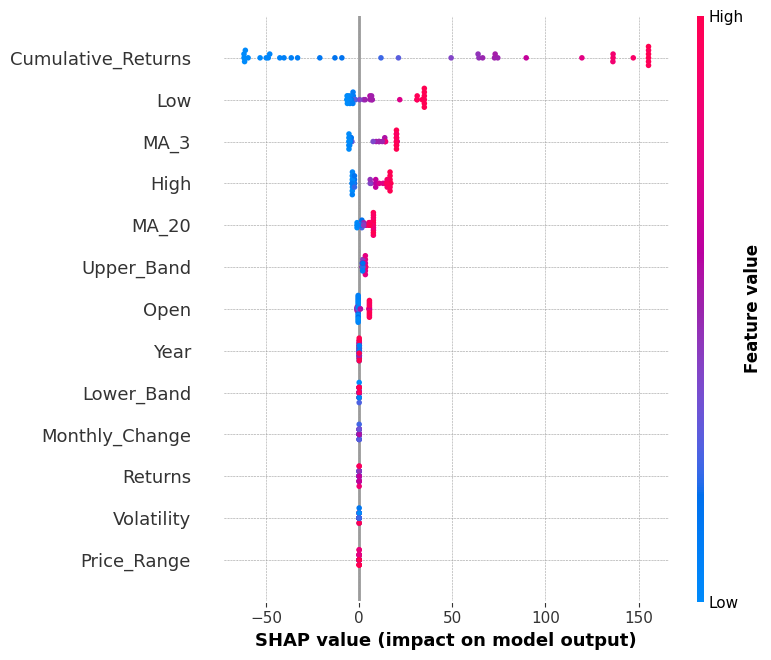

In [176]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(gbr_model, X_train)  # Replace gbr_model with your trained Gradient Boosting model

# Compute SHAP values
shap_values = explainer(X_test)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test)


The SHAP summary plot shows how each feature impacts the model's predictions, with Cumulative_Returns having the highest influence. Features like Low, MA_3, and High also contribute significantly, with both positive and negative effects on the target variable.

# **Conclusion**

The analysis of Yes Bank stock prices involved a combination of statistical and machine learning models, including Gradient Boosting, XGBoost, and LightGBM. The dataset underwent preprocessing, including handling missing values, feature engineering, and splitting into training and testing sets. Initial exploratory data analysis highlighted key trends and volatility in stock prices.

Among the models tested, Gradient Boosting achieved the lowest mean squared error (MSE) of 112 after multiple rounds of hyperparameter tuning using Optuna. XGBoost, initially at 298 MSE, improved to 128 after optimization, while LightGBM, starting from 1124, reduced to 765 but remained less competitive. Feature importance analysis using SHAP revealed that indicators like moving averages (MA_3, MA_20), cumulative returns, and volatility played a crucial role in predicting stock prices.

The results indicate that tree-based ensemble models outperform traditional ARIMA for stock price forecasting, with Gradient Boosting emerging as the most effective. However, further improvements could be made by incorporating additional technical indicators, tuning hyperparameters further, or experimenting with deep learning approaches. Overall, this study provides a strong foundation for predictive modeling in stock price forecasting, demonstrating the importance of feature selection, model optimization, and explainability in financial time series analysis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***